# 유아용품 CRM 데이터

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import platform
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [2]:
member_data = pd.read_csv('Member_data02.csv')
product_data = pd.read_csv('Product_data.csv')
sales_data = pd.read_csv('Sales_data02.csv', low_memory=False)

##### 고객 정보 데이터(Row : 81,360, Column : 8)

- ID : 회원 고유 번호
- 성별 : 회원 성별
- 결혼 유무 : 회원 결혼 유무
- 거주 지역 : 회원 거주 지역
- 연령 : 회원 연령
- 결제등록카드 : 회원 결제 카드
- 유입 경로 : 회원 유입 경로
- 자녀 여부 : 자녀 유무


In [3]:
member_data = member_data.dropna(axis = 0)
member_data

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
0,2.018123e+14,여,기혼,인천,37.0,국민은행,인스타그램,Yes
1,2.018123e+14,여,기혼,제주,33.0,국민은행,검색광고,Yes
2,2.018123e+14,여,기혼,부산,32.0,하나은행,네이버블로그,Yes
3,2.018123e+14,여,미혼,경남,34.0,기업은행,지인추천,No
4,2.018123e+14,여,기혼,서울,32.0,신한은행,직접검색,Yes
...,...,...,...,...,...,...,...,...
81089,2.019123e+14,여,기혼,경기,31.0,국민은행,오픈마켓,Yes
81090,2.019123e+14,여,기혼,경남,37.0,롯데카드,오픈마켓,Yes
81091,2.019123e+14,여,기혼,충북,26.0,삼성카드,검색광고,Yes
81092,2.019123e+14,여,기혼,경기,32.0,새마을금고,인스타그램,Yes


##### 유아 용품 데이터(Row : 3,048 / Column : 4)

- 제품명 : 제품명
- 제품 대분류 : 제품 대분류
- 제품 판매량 : 제품 판매량
- 제품 단가 : 제품 가격

In [4]:
product_data.head()

,물품대분류,상품명,물품판매량,제품단가
0,FC,(1+1) 좋은느낌 입는 오버나이트 대형 8개입,15,0
1,FC,(1+1) 좋은느낌 입는 오버나이트 중형 8개입,10,0
2,FC,(1+1) 화이트 입는 오버나이트 대형 L 8개입 (EA),27,0
3,FC,(1+1) 화이트 입는 오버나이트 중형 M 8개입 (EA),12,0
4,FC,(핫딜위크/1+1) 좋은느낌 입는 오버나이트 대형 8개입,4,0


##### 유아 용품 구매 이력 데이터(Row : 199,999/Column : 10)

- 주분 번호 : 주문 고유 번호
- 구매일 : 제품 구매 일자
- 구매 시 자녀 월령 : 제품 구매 시 회원 자녀 월령(-: 출산 예정)
- 고객 번호 : 회원 고유 번호
- 구매 금액 : 상품 구매 금액
- 결제 금액 : 회원 결제 금액(포인트 결제 차감 가능)
- 상품명 : 상품명

In [5]:
sales_data.head()

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입)
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형)
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)


## 데이터 정보확인

In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   주문번호       199999 non-null  object 
 1   구매일        199999 non-null  object 
 2   배송시작일      199999 non-null  object 
 3   배송완료일      199999 non-null  object 
 4   구매시월령(수정)  168142 non-null  float64
 5   고객번호       199999 non-null  object 
 6   구매금액       199999 non-null  int64  
 7   결제금액       199999 non-null  int64  
 8   물품대분류      199999 non-null  object 
 9   상품명        199999 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.3+ MB


In [7]:
# 이상치 확인

sales_data.isnull().sum()

주문번호             0
구매일              0
배송시작일            0
배송완료일            0
구매시월령(수정)    31857
고객번호             0
구매금액             0
결제금액             0
물품대분류            0
상품명              0
dtype: int64

In [8]:
product_data[product_data['제품단가'] == 0]

,물품대분류,상품명,물품판매량,제품단가
0,FC,(1+1) 좋은느낌 입는 오버나이트 대형 8개입,15,0
1,FC,(1+1) 좋은느낌 입는 오버나이트 중형 8개입,10,0
2,FC,(1+1) 화이트 입는 오버나이트 대형 L 8개입 (EA),27,0
3,FC,(1+1) 화이트 입는 오버나이트 중형 M 8개입 (EA),12,0
4,FC,(핫딜위크/1+1) 좋은느낌 입는 오버나이트 대형 8개입,4,0
...,...,...,...,...
2896,팬티,하기스 네이처메이드 밤부 4단계 여아 120매(밴드형) X 3,1,0
2898,팬티,하기스 네이처메이드 밤부 5단계 남아 102매(밴드형) X2,1,0
2900,팬티,하기스 네이처메이드 썸머팬티 5단계 공용 68매(팬티형) X 3,6,0
2901,팬티,하기스 네이처메이드 썸머팬티 6단계 공용 58매(팬티형) X 3,1,0


In [9]:
sales_data['주문번호'].nunique()

182426

In [10]:
sac = sales_data[sales_data['주문번호'].str.contains('-')]

In [11]:
sac['고객번호'].nunique()

13185

In [12]:
sales_data['물품대분류'].unique()

array(['더블하트', '팬티', 'FMC', '기저귀', '체험팩', 'FC', '기타', '물티슈', 'SKC', 'SrC'],
      dtype=object)

In [13]:
product_data['물품대분류'].unique()

array(['FC', 'FMC', 'SKC', 'SrC', '기저귀', '기타', '더블하트', '물티슈', '체험팩', '팬티'],
      dtype=object)

## 이상치 수정

In [14]:
sales_data['구매시월령(수정)'].describe()

count    168142.000000
mean         14.845458
std          38.521315
min         -10.000000
25%           2.000000
50%           6.000000
75%          13.000000
max        1439.000000
Name: 구매시월령(수정), dtype: float64

In [15]:
sales_data['구매시월령(수정)'][0]

4.0

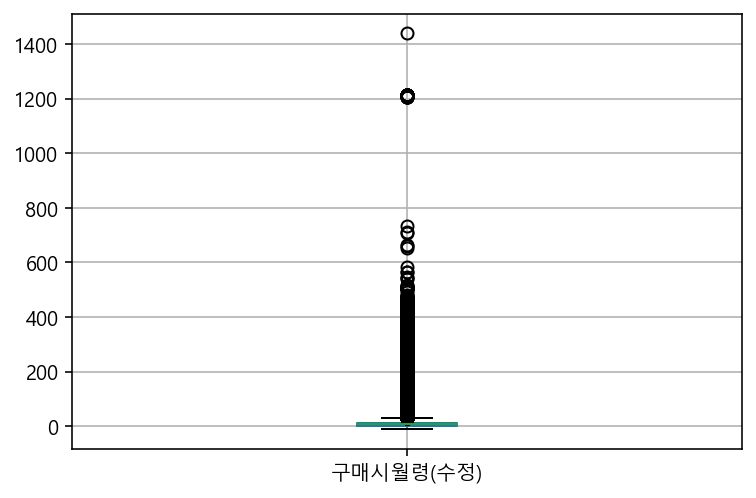

In [16]:
sales_data.boxplot(column = ['구매시월령(수정)'])
plt.show()

In [17]:
sales_data[sales_data['고객번호'] == '201812310749770']

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤


In [18]:
sales_data['구매시월령(수정)'].describe()
# sales_data['구매시월령(수정)'] =  sales_data['구매시월령(수정)'] // 12 +1 -> 나이로 바꾸고 싶을떄

count    168142.000000
mean         14.845458
std          38.521315
min         -10.000000
25%           2.000000
50%           6.000000
75%          13.000000
max        1439.000000
Name: 구매시월령(수정), dtype: float64

<AxesSubplot:xlabel='구매시월령(수정)', ylabel='Count'>

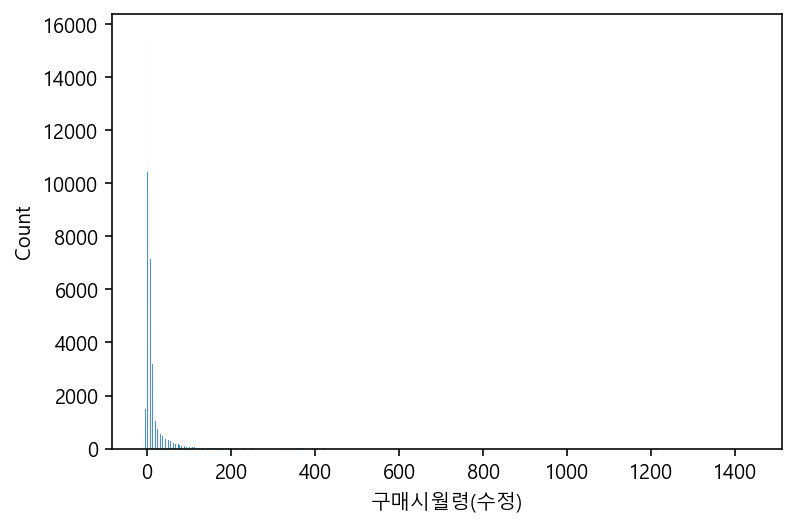

In [19]:
sns.histplot(sales_data, x="구매시월령(수정)")

In [20]:
over_ = sales_data[sales_data['구매시월령(수정)'] >= 8]
over_

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형)
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)
5,201907282649358,2019-07-29,2019-07-30,2019-08-02,8.0,201812310749774,101280,76744,기저귀,[2019년형] 하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)
17,201909272881275,2019-09-28,2019-09-29,2019-10-01,8.0,201812310749784,47360,29952,팬티,하기스 맥스드라이 팬티 3단계 여아 116매(팬티형)
18,202001163303774,2020-01-17,2020-01-18,2020-01-20,12.0,201812310749784,13500,13500,기타,[필리앤임프스] 바디슈트 4종 택1
...,...,...,...,...,...,...,...,...,...,...
199962,20200616152300-27824950140,2020-06-17,2020-06-18,2020-06-20,23.0,20200603223916327908,43900,27372,팬티,2020 하기스 매직팬티 컴포트 썸머 3단계 공용 116매(팬티형) + 보너스 12...
199967,20200628072347-19416984457,2020-06-28,2020-06-29,2020-07-01,14.0,20200614095002296695,6900,5730,체험팩,NEW 하기스 맥스드라이 팬티 4단계 공용 20매(팬티형/체험팩) (EA)
199974,20200620124150-32007118641,2020-06-20,2020-06-21,2020-06-23,175.0,20200620123220059942,3150,2480,FMC,[2020년 3월 신제품] 크리넥스 안심 물티슈 휴대용 20매X3개입 (EA)
199975,20200620124150-32007118641,2020-06-20,2020-06-21,2020-06-23,175.0,20200620123220059942,0,0,FMC,(1+1) 크리넥스 버블버블 핸드워시 그린향 거품펌프형 250ml + 용기형리필 2...


In [21]:
product_data[product_data['물품대분류'] == 'FMC']

,물품대분류,상품명,물품판매량,제품단가
255,FMC,(1+1) 크리넥스 버블버블 핸드워시 그린향 거품펌프형 250ml + 용기형리필 2...,30,0
256,FMC,(1+1) 크리넥스 버블버블 핸드워시 상큼향 거품펌프형 250ml + 용기형리필 2...,17,0
257,FMC,(핫딜위크/1+1) 스카트 주방 위생 세트,12,0
258,FMC,(핫딜위크/1+1) 크리넥스 칼로리라이트 키친타월 55매 X 3롤,6,0
259,FMC,[1+1] 스카트 항균 프레쉬블루 빨아쓰는 행주타월 45매 X 4롤,30,24800
...,...,...,...,...
475,FMC,크리넥스 황사마스크 뉴디자인플러스 대형 3P,209,11866
476,FMC,크리넥스 황사마스크 뉴디자인플러스 소형 3P,309,16037
477,FMC,크리넥스 황사용 마스크 플러스 대형10P,222,19871
478,FMC,크리넥스/스카트 세트,54,38100


In [22]:
# member_data[member_data['ID'].str.contains('2018')]
# 멤버 정보를 확인해보기 위해
member_data[member_data['ID'] == 2018]

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부


In [23]:
member_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81094 entries, 0 to 81093
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      81094 non-null  float64
 1   성별      81094 non-null  object 
 2   결혼유무    81094 non-null  object 
 3   거주지역    81094 non-null  object 
 4   연령      81094 non-null  float64
 5   결제등록카드  81094 non-null  object 
 6   유입경로    81094 non-null  object 
 7   자녀여부    81094 non-null  object 
dtypes: float64(2), object(6)
memory usage: 5.6+ MB


## 데이터 전처리

In [24]:
sales_data['고객번호'] = sales_data['고객번호'].astype('float')

In [25]:
product_data['total'] = product_data['물품판매량'] * product_data['제품단가']

In [26]:
product_data['total'].max()

194683790

In [27]:
product_data[product_data['total'] == 194683790]

,물품대분류,상품명,물품판매량,제품단가,total
768,기저귀,하기스 네이처메이드 2단계 여아 156매(밴드형),3010,64679,194683790


In [28]:
product = product_data[['물품대분류', '상품명', '제품단가']]

###### 데이터 Merge
- 제품명에서 제품총 수요량 필요 연관성 없어서 제외

In [29]:
df = pd.merge(sales_data, member_data, right_on='ID', left_on = '고객번호')
merge_outer = pd.merge(sales_data, member_data, right_on='ID', left_on = '고객번호', how = 'left')

In [30]:
merge_outer['ID'] = merge_outer['ID'].astype('str')

no_outer = merge_outer[merge_outer['자녀여부'] == 'No']
yes_outer = merge_outer[merge_outer['자녀여부'] == 'Yes']

no_outer[no_outer['구매시월령(수정)'] >= 90]

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
1923,201901151902351,2019-01-15,2019-01-16,2019-01-19,117.0,2.019010e+14,19800,13751,SKC,그린핑거 마이키즈 로션 대용량 330ml,201901030751620.0,남,미혼,전남,31.0,우리은행,네이버블로그,No
1924,201901151902351,2019-01-15,2019-01-16,2019-01-19,117.0,2.019010e+14,2600,2574,FC,좋은느낌 순수 울트라 날개 중형 18개입,201901030751620.0,남,미혼,전남,31.0,우리은행,네이버블로그,No
2723,201902272089585,2019-02-28,2019-03-01,2019-03-05,314.0,2.019010e+14,12900,8157,더블하트,더블하트 SofTouch 모유실감 젖꼭지 S (2입),201901040752621.0,여,기혼,충북,32.0,우리은행,인스타그램,No
2724,201903312221678,2019-04-01,2019-04-02,2019-04-04,316.0,2.019010e+14,9500,7137,더블하트,더블하트 다기능 빨대 브러쉬,201901040752621.0,여,기혼,충북,32.0,우리은행,인스타그램,No
2725,201910243005683,2019-10-25,2019-10-26,2019-10-28,322.0,2.019010e+14,12900,9187,더블하트,더블하트 SofTouch 모유실감 젖꼭지 L (2입),201901040752621.0,여,기혼,충북,32.0,우리은행,인스타그램,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197214,201912193204396,2019-12-20,2019-12-21,2019-12-24,159.0,2.019122e+14,52800,30674,기저귀,하기스 보송보송 3단계 공용 186매(밴드형),201912191052918.0,여,미혼,서울,32.0,미래에셋증권,오픈마켓,No
197326,201912193206380,2019-12-20,2019-12-21,2019-12-23,108.0,2.019122e+14,7700,5227,FMC,크리넥스 안심 프리미엄 3겹 키친타월 140매 X 4롤,201912191053196.0,여,기혼,서울,31.0,BC카드,지인추천,No
197590,202001273336894,2020-01-27,2020-01-28,2020-01-30,184.0,2.019122e+14,12900,8064,FMC,크리넥스 3겹 수프림 소프트 27m 12롤,201912191053644.0,여,미혼,충북,33.0,광주은행,인스타그램,No
197997,201912203220117,2019-12-21,2019-12-22,2019-12-24,92.0,2.019122e+14,22500,12474,SKC,그린핑거 마이키즈 샴푸 대용량 500ml,201912201054504.0,여,기혼,경남,27.0,BC카드,검색광고,No


In [31]:
yes_outer[yes_outer['구매시월령(수정)'] >= 90]

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
318,202001093283175,2020-01-10,2020-01-11,2020-01-13,167.0,2.019010e+14,3000,3000,체험팩,맘큐 허그박스,201901010750103.0,여,기혼,경기,32.0,국민은행,검색광고,Yes
439,201901011864727,2019-01-01,2019-01-02,2019-01-04,98.0,2.019010e+14,23800,18848,물티슈,릴리유 무민 리미티드 아기물티슈 캡형 80매X10팩,201901010750193.0,남,기혼,부산,33.0,농협회원조합,네이버카페,Yes
447,201903312218708,2019-03-31,2019-04-01,2019-04-03,101.0,2.019010e+14,12000,8266,FMC,“스페인하숙에 나온 바로 그 행주” 스카트 항균 프레쉬블루 행주타올 45매 X 4롤,201901010750202.0,여,기혼,서울,31.0,신한은행,검색광고,Yes
448,201908302782324,2019-08-30,2019-08-31,2019-09-02,106.0,2.019010e+14,17600,15324,FMC,크리넥스 NEW 디럭스 미니_카카오 230매 X 6개입,201901010750202.0,여,기혼,서울,31.0,신한은행,검색광고,Yes
457,201903312221229,2019-04-01,2019-04-02,2019-04-04,341.0,2.019010e+14,2000,1584,FMC,크리넥스 여행용티슈 카카오프렌즈 70매 X 3개입,201901010750221.0,여,기혼,부산,35.0,국민은행,인스타그램,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198319,202002123396582,2020-02-12,2020-02-13,2020-02-15,143.0,2.019122e+14,54480,37622,기저귀,하기스 네이처메이드 밤부 2단계 여아 156매(밴드형),201912221055286.0,여,기혼,경남,38.0,농협회원조합,인스타그램,Yes
198769,201912253234186,2019-12-25,2019-12-26,2019-12-28,112.0,2.019123e+14,16500,10286,SKC,그린핑거 힘센 보습 울트라크림 300g,201912251056311.0,여,기혼,경기,34.0,신한은행,오픈마켓,Yes
199023,202001313356450,2020-01-31,2020-02-01,2020-02-05,156.0,2.019123e+14,6040,4851,체험팩,하기스 맥스드라이 3단계 공용 20매(밴드형/체험팩),201912261056947.0,여,기혼,경북,34.0,국민은행,네이버블로그,Yes
199024,20200623165452-20315027851,2020-06-24,2020-06-25,2020-06-27,161.0,2.019123e+14,5900,5841,체험팩,NEW 하기스 네이처메이드 팬티 3단계 남아 20매(팬티형/체험팩) (EA),201912261056947.0,여,기혼,경북,34.0,국민은행,네이버블로그,Yes


In [32]:
df = df.merge(product, on = ['물품대분류', '상품명'])

##### Datetime으로 데이터 변경

In [33]:
df['배송시작일']=pd.to_datetime(df['배송시작일'],format = '%Y-%m-%d')
df['구매일']=pd.to_datetime(df['구매일'],format = '%Y-%m-%d')
df['배송완료일']=pd.to_datetime(df['배송완료일'],format = '%Y-%m-%d')

##### 자녀 여부에 따른 데이터 숫자화

In [34]:
# Yes : 1, No : 0
df['자녀여부'] = df['자녀여부'].replace('Yes', 1).replace('No', 0)

##### 배송기간 ~ 배송시작기간 까지 새로운 컬럼 생성

In [35]:
df['배송기간'] = df['배송완료일'] -df['배송시작일']
df['구매에서 배송완료까지'] = df['배송완료일']- df['구매일']
df['배송시작기간'] = df['배송시작일'] - df['구매일']


#####  필요 없는 부분 Drop

In [36]:

df.drop(['주문번호', 'ID'], axis = 1, inplace = True)

##### 성별 및 결혼 유무 데이터 숫자화
- 여성 : 1, 남성 : 0
- 기혼 : 1, 미혼 : 0

In [37]:
df['성별'] = df['성별']. replace('여', 1).replace('남', 0)
df['결혼유무'] = df['결혼유무'].replace('기혼', 1).replace('미혼', 0)
df['고객번호'].astype('float64')

0         2.018123e+14
1         2.018123e+14
2         2.018123e+14
3         2.018123e+14
4         2.018123e+14
              ...     
199578    2.019123e+14
199579    2.019123e+14
199580    2.019123e+14
199581    2.019123e+14
199582    2.019123e+14
Name: 고객번호, Length: 199583, dtype: float64

##### 이상치 처리하기
- 마이너스 숫자 0으로 처리
- 출산예정 : 0

In [38]:
def minus_change(i):
    if i < 0:
        return 0
    else:
        return i

df['구매시월령(수정)'] = df['구매시월령(수정)'].apply(minus_change)

In [39]:


df['구매시월령(수정)'] = df['구매시월령(수정)'].fillna(0)
df[df['구매시월령(수정)'] < 0]

,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,제품단가,배송기간,구매에서 배송완료까지,배송시작기간


##### 데이터 새로운 CSV로 처리

In [40]:
data = pd.read_csv('eda_data.csv')

## 데이터 EDA 처리

In [43]:
data['고객번호'][199582]

201912271057299.0

In [44]:
before_year = df[df['구매일'] < '2019-08-08']
current_year = df[df['구매일'] > '2020-01-01']

In [45]:
current_year['구매일']

14       2020-03-21
15       2020-04-01
54       2020-02-22
156      2020-03-22
157      2020-01-08
            ...    
199578   2020-02-26
199579   2020-03-05
199580   2020-03-05
199581   2020-03-06
199582   2020-04-08
Name: 구매일, Length: 61876, dtype: datetime64[ns]

In [46]:
print(len(before_year))
print(len(current_year))

66881
61876


In [47]:
df['배송기간'].describe()

count                       199583
mean     2 days 08:53:25.355165520
std      0 days 14:38:54.058152587
min                2 days 00:00:00
25%                2 days 00:00:00
50%                2 days 00:00:00
75%                3 days 00:00:00
max                4 days 00:00:00
Name: 배송기간, dtype: object

In [48]:
return_customer = before_year.groupby('고객번호').agg(count = ('고객번호', 'count'))
return_customer = return_customer[return_customer['count'] >= 2]

In [49]:
total = data.groupby('고객번호').agg(count =( '고객번호', 'count'))
total_re_percent =len(total[total['count'] >= 2]) / len(total) * 100
total_re_percent
print(f'전체 재구매율은 {round(total_re_percent, 2)}% 입니다.')

전체 재구매율은 44.7% 입니다.


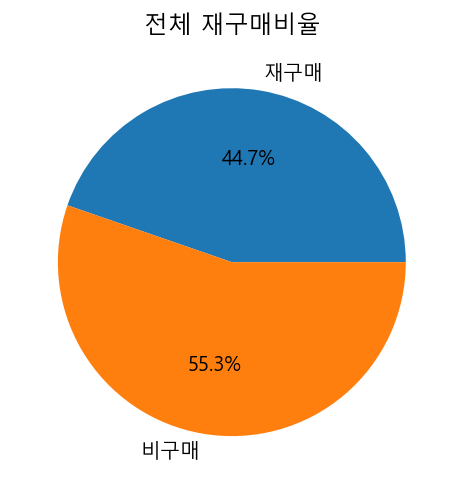

In [50]:
x = ['재구매', '비구매']
y = [round(total_re_percent, 2), 100 - round(total_re_percent, 2)]



plt.title("전체 재구매비율")
plt.pie(y, labels=x, autopct='%1.1f%%')
plt.show()

In [51]:
return_customer

,count
고객번호,
2.018123e+14,2
2.018123e+14,4
2.018123e+14,2
2.018123e+14,9
2.018123e+14,2
...,...
2.019081e+14,3
2.019081e+14,2
2.019081e+14,2


In [52]:
result_before = len(return_customer) / len(before_year) * 100

In [53]:
result_before

20.599273336224037

In [54]:
current_year

,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,제품단가,배송기간,구매에서 배송완료까지,배송시작기간
14,2020-03-21,2020-03-22,2020-03-24,5.0,2.019010e+14,12900,9702,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,대전,36.0,신한은행,검색광고,1,20583,2 days,3 days,1 days
15,2020-04-01,2020-04-02,2020-04-04,5.0,2.019010e+14,12900,8167,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,대전,36.0,신한은행,검색광고,1,20583,2 days,3 days,1 days
54,2020-02-22,2020-02-23,2020-02-25,5.0,2.019011e+14,12900,7840,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,경기,35.0,신한은행,네이버블로그,0,20583,2 days,3 days,1 days
156,2020-03-22,2020-03-23,2020-03-25,6.0,2.019011e+14,12900,10216,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,0,서울,36.0,롯데카드,지인추천,0,20583,2 days,3 days,1 days
157,2020-01-08,2020-01-09,2020-01-11,14.0,2.019011e+14,12900,7662,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,경남,32.0,농협회원조합,인스타그램,1,20583,2 days,3 days,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199578,2020-02-26,2020-02-27,2020-02-29,2.0,2.019123e+14,39600,39600,기타,[실리만] 실리콘 어린이 식탁매트(동물) WSB264-레몬,1,1,경기,31.0,우리은행,인스타그램,1,39600,2 days,3 days,1 days
199579,2020-03-05,2020-03-06,2020-03-08,2.0,2.019123e+14,39600,39600,기타,[실리만] 실리콘 어린이 식탁매트(동물) WSB264-하늘,1,1,경기,31.0,우리은행,인스타그램,1,39600,2 days,3 days,1 days
199580,2020-03-05,2020-03-06,2020-03-08,2.0,2.019123e+14,19800,19800,기타,[실리만] 실리콘 어린이 식판 WSB262 하늘,1,1,경기,31.0,우리은행,인스타그램,1,19800,2 days,3 days,1 days
199581,2020-03-06,2020-03-07,2020-03-09,2.0,2.019123e+14,19800,19800,기타,[실리만] 실리콘 어린이 식판 WSB262 하늘,1,1,경기,31.0,우리은행,인스타그램,1,19800,2 days,3 days,1 days


In [55]:
current_customer = current_year.groupby('고객번호').agg(count = ('고객번호', 'count'))
return_current = current_customer[current_customer['count'] >= 2]

In [56]:
result_current = len(return_current) / len(current_year) * 100
result_current

21.431572823065487

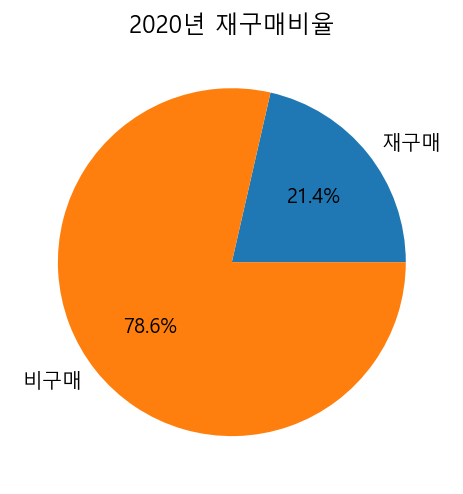

In [57]:
x = ['재구매', '비구매']
y = [round(result_current, 2), 100 - round(result_current, 2)]

plt.title("2020년 재구매비율")
plt.pie(y, labels=x, autopct='%1.1f%%')
plt.show()

In [58]:
how_day = data.groupby(['거주지역', '배송기간', '물품대분류']).agg(count = ('고객번호', 'count')).reset_index()
how_day[how_day['물품대분류'] == '기저귀']

,거주지역,배송기간,물품대분류,count
3,강원,2 days,기저귀,2009
12,강원,3 days,기저귀,660
21,강원,4 days,기저귀,204
31,경기,2 days,기저귀,4976
40,경기,3 days,기저귀,1590
50,경기,4 days,기저귀,465
59,경남,2 days,기저귀,857
69,경남,3 days,기저귀,287
78,경남,4 days,기저귀,90
88,경북,2 days,기저귀,1033


In [59]:
day_over = how_day[how_day['배송기간'] >= '3']
over = day_over[day_over['물품대분류'] == '기저귀']
over['total'] = over['count'].cumsum()
over

C:\Users\Song\AppData\Local\Temp\ipykernel_20388\1886052910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  over['total'] = over['count'].cumsum()


,거주지역,배송기간,물품대분류,count,total
12,강원,3 days,기저귀,660,660
21,강원,4 days,기저귀,204,864
40,경기,3 days,기저귀,1590,2454
50,경기,4 days,기저귀,465,2919
69,경남,3 days,기저귀,287,3206
78,경남,4 days,기저귀,90,3296
97,경북,3 days,기저귀,327,3623
106,경북,4 days,기저귀,109,3732
125,광주,3 days,기저귀,193,3925
134,광주,4 days,기저귀,57,3982


In [60]:
double_heart = data[data['상품명'].str.contains('더블하트')]
double_heart

,Unnamed: 0,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,...,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,제품단가,배송기간,구매에서 배송완료까지,배송시작기간
0,0,2019-05-06,2019-05-07,2019-05-11,4.0,2.018123e+14,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),...,1,인천,37.0,국민은행,인스타그램,1,20583,4 days,5 days,1 days
1,1,2019-01-01,2019-01-02,2019-01-04,1.0,2.018123e+14,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),...,1,강원,33.0,농협회원조합,인스타그램,1,20583,2 days,3 days,1 days
2,2,2019-04-14,2019-04-15,2019-04-18,2.0,2.018123e+14,25800,17344,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),...,1,대전,32.0,농협중앙회,네이버카페,1,20583,3 days,4 days,1 days
3,3,2019-05-21,2019-05-22,2019-05-25,0.0,2.018123e+14,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),...,1,제주,32.0,롯데카드,네이버카페,1,20583,3 days,4 days,1 days
4,4,2019-07-17,2019-07-18,2019-07-20,3.0,2.018123e+14,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),...,1,서울,31.0,국민은행,인스타그램,1,20583,2 days,3 days,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199511,199511,2020-08-01,2020-08-02,2020-08-04,2.0,2.019121e+14,17600,17420,더블하트,더블하트 베이비 크림 100ml (EA),...,1,전북,40.0,국민은행,네이버카페,1,17600,2 days,3 days,1 days
199525,199525,2020-05-17,2020-05-18,2020-05-21,3.0,2.019112e+14,33120,31140,더블하트,더블하트 마그마그 스트로컵 올인원 세트 (EA),...,1,충남,34.0,삼성카드,네이버블로그,1,33120,3 days,4 days,1 days
199526,199526,2020-05-28,2020-05-29,2020-05-31,4.0,2.019121e+14,33120,27210,더블하트,더블하트 마그마그 스트로컵 올인원 세트 (EA),...,1,서울,35.0,부산은행,지인추천,1,33120,2 days,3 days,1 days
199527,199527,2020-07-03,2020-07-04,2020-07-06,4.0,2.019122e+14,33120,31120,더블하트,더블하트 마그마그 스트로컵 올인원 세트 (EA),...,1,경기,36.0,롯데카드,인스타그램,1,33120,2 days,3 days,1 days


In [61]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [62]:
delay_delivery_current = current_year[current_year['배송기간'] > '2 days']
delay_delivey_percent = len(delay_delivery_current) / len(current_year) * 100
delay_delivey_percent

30.136078608830562

In [63]:
delay_delivery_before = before_year[before_year['배송기간'] > '2 days']
delay_delivery_percent_before = len(delay_delivery_before) / len(before_year) * 100
delay_delivery_percent_before

29.960676425292682

In [64]:
data

,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,제품단가,배송기간,구매에서 배송완료까지,배송시작기간
0,2019-05-06,2019-05-07,2019-05-11,4.0,2.018123e+14,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,인천,37.0,국민은행,인스타그램,1,20583,4 days,5 days,1 days
1,2019-01-01,2019-01-02,2019-01-04,1.0,2.018123e+14,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,강원,33.0,농협회원조합,인스타그램,1,20583,2 days,3 days,1 days
2,2019-04-14,2019-04-15,2019-04-18,2.0,2.018123e+14,25800,17344,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,대전,32.0,농협중앙회,네이버카페,1,20583,3 days,4 days,1 days
3,2019-05-21,2019-05-22,2019-05-25,0.0,2.018123e+14,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,제주,32.0,롯데카드,네이버카페,1,20583,3 days,4 days,1 days
4,2019-07-17,2019-07-18,2019-07-20,3.0,2.018123e+14,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,서울,31.0,국민은행,인스타그램,1,20583,2 days,3 days,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199578,2020-02-26,2020-02-27,2020-02-29,2.0,2.019123e+14,39600,39600,기타,[실리만] 실리콘 어린이 식탁매트(동물) WSB264-레몬,1,1,경기,31.0,우리은행,인스타그램,1,39600,2 days,3 days,1 days
199579,2020-03-05,2020-03-06,2020-03-08,2.0,2.019123e+14,39600,39600,기타,[실리만] 실리콘 어린이 식탁매트(동물) WSB264-하늘,1,1,경기,31.0,우리은행,인스타그램,1,39600,2 days,3 days,1 days
199580,2020-03-05,2020-03-06,2020-03-08,2.0,2.019123e+14,19800,19800,기타,[실리만] 실리콘 어린이 식판 WSB262 하늘,1,1,경기,31.0,우리은행,인스타그램,1,19800,2 days,3 days,1 days
199581,2020-03-06,2020-03-07,2020-03-09,2.0,2.019123e+14,19800,19800,기타,[실리만] 실리콘 어린이 식판 WSB262 하늘,1,1,경기,31.0,우리은행,인스타그램,1,19800,2 days,3 days,1 days


In [65]:
data

,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,제품단가,배송기간,구매에서 배송완료까지,배송시작기간
0,2019-05-06,2019-05-07,2019-05-11,4.0,2.018123e+14,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,인천,37.0,국민은행,인스타그램,1,20583,4 days,5 days,1 days
1,2019-01-01,2019-01-02,2019-01-04,1.0,2.018123e+14,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,강원,33.0,농협회원조합,인스타그램,1,20583,2 days,3 days,1 days
2,2019-04-14,2019-04-15,2019-04-18,2.0,2.018123e+14,25800,17344,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,대전,32.0,농협중앙회,네이버카페,1,20583,3 days,4 days,1 days
3,2019-05-21,2019-05-22,2019-05-25,0.0,2.018123e+14,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,제주,32.0,롯데카드,네이버카페,1,20583,3 days,4 days,1 days
4,2019-07-17,2019-07-18,2019-07-20,3.0,2.018123e+14,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,1,서울,31.0,국민은행,인스타그램,1,20583,2 days,3 days,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199578,2020-02-26,2020-02-27,2020-02-29,2.0,2.019123e+14,39600,39600,기타,[실리만] 실리콘 어린이 식탁매트(동물) WSB264-레몬,1,1,경기,31.0,우리은행,인스타그램,1,39600,2 days,3 days,1 days
199579,2020-03-05,2020-03-06,2020-03-08,2.0,2.019123e+14,39600,39600,기타,[실리만] 실리콘 어린이 식탁매트(동물) WSB264-하늘,1,1,경기,31.0,우리은행,인스타그램,1,39600,2 days,3 days,1 days
199580,2020-03-05,2020-03-06,2020-03-08,2.0,2.019123e+14,19800,19800,기타,[실리만] 실리콘 어린이 식판 WSB262 하늘,1,1,경기,31.0,우리은행,인스타그램,1,19800,2 days,3 days,1 days
199581,2020-03-06,2020-03-07,2020-03-09,2.0,2.019123e+14,19800,19800,기타,[실리만] 실리콘 어린이 식판 WSB262 하늘,1,1,경기,31.0,우리은행,인스타그램,1,19800,2 days,3 days,1 days


In [66]:
data['물품구매량'] =  data['구매금액']//data['제품단가']

In [67]:
data[data['물품구매량'] == 0]['상품명'].nunique()

1598

In [68]:
count_zero = data[data['물품구매량'] == 0]
# count_zero.groupby('물품대분류').agg('결제금액', 'sum')
count_zero

,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,성별,...,거주지역,연령,결제등록카드,유입경로,자녀여부,제품단가,배송기간,구매에서 배송완료까지,배송시작기간,물품구매량
3,2019-05-21,2019-05-22,2019-05-25,0.0,2.018123e+14,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,...,제주,32.0,롯데카드,네이버카페,1,20583,3 days,4 days,1 days,0.0
4,2019-07-17,2019-07-18,2019-07-20,3.0,2.018123e+14,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,...,서울,31.0,국민은행,인스타그램,1,20583,2 days,3 days,1 days,0.0
5,2019-03-25,2019-03-26,2019-03-28,3.0,2.018123e+14,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,...,경기,32.0,국민은행,네이버블로그,1,20583,2 days,3 days,1 days,0.0
8,2019-04-11,2019-04-12,2019-04-14,4.0,2.018123e+14,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),0,...,충남,31.0,현대카드,인스타그램,0,20583,2 days,3 days,1 days,0.0
9,2019-03-21,2019-03-22,2019-03-25,4.0,2.019010e+14,12900,10206,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,...,서울,30.0,신한카드,네이버블로그,1,20583,3 days,4 days,1 days,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199351,2020-05-28,2020-05-29,2020-05-31,6.0,2.019101e+14,16900,16900,기타,[맘마밀] 안심이유식 6개월 단호박과 소고기 100g 10팩,1,...,서울,29.0,국민은행,인스타그램,1,18233,2 days,3 days,1 days,0.0
199370,2019-12-26,2019-12-27,2019-12-29,0.0,2.019092e+14,13500,13500,기타,[실리만] 실리콘 욕실 양치컵 WSS303,1,...,경기,35.0,부산은행,인스타그램,0,20250,2 days,3 days,1 days,0.0
199372,2020-02-27,2020-02-28,2020-03-03,7.0,2.019091e+14,8900,8900,기타,[실리만] 실리콘 칫솔치발기 WSB241 연핑크,1,...,대구,30.0,신한은행,지인추천,1,11200,4 days,5 days,1 days,0.0
199408,2020-02-24,2020-02-25,2020-02-27,3.0,2.019093e+14,2100,2100,기타,[실리만] 실리콘 펭귄 핸드폰 거치대 WSA102 노랑,1,...,전북,35.0,국민카드,인스타그램,1,2800,2 days,3 days,1 days,0.0


In [69]:
count_over1 = data[data['물품구매량'] > 0]
group_sum_over1 = count_over1.groupby('물품대분류').agg(sum_data = ('결제금액', 'sum')).reset_index().sort_values(by = 'sum_data', ascending = False)
group_sum_over1['cumsum'] = group_sum_over1['sum_data'].cumsum()
group_sum_over1['sales_percent'] = round(group_sum_over1['sum_data'] / 4333408584 *100, 1)
group_sum_over1.drop('cumsum', axis = 1, inplace = True)
group_sum_over1

,물품대분류,sum_data,sales_percent
4,기저귀,483727222,11.2
9,팬티,419555908,9.7
6,더블하트,248851681,5.7
8,체험팩,174271612,4.0
1,FMC,111452227,2.6
5,기타,72821001,1.7
0,FC,53256980,1.2
2,SKC,39960689,0.9
7,물티슈,29162264,0.7
3,SrC,167840,0.0


([<matplotlib.patches.Wedge at 0x29f108a2370>,
 [Text(0.6546939308482748, 0.883954669035938, '기저귀'),
  Text(-0.9823856296839606, 0.494892386878651, '팬티'),
  Text(-0.7531356156096649, -0.8017398234466412, '더블하트'),
  Text(0.05955249713455229, -1.0983867716269344, '체험팩'),
  Text(0.6248709557185029, -0.9052824358726093, 'FMC'),
  Text(0.9026706513548126, -0.6286379682954876, '기타'),
  Text(1.0268835992927592, -0.3943476556333869, 'FC'),
  Text(1.079857804279532, -0.20954026471441767, 'SKC'),
  Text(1.0981290723865327, -0.06412909152244196, '물티슈'),
  Text(1.099999999999953, -3.2184197787129547e-07, 'SrC')],
 [Text(0.35710578046269525, 0.48215709220142067, '29.7%'),
  Text(-0.5358467071003421, 0.2699413019338096, '25.7%'),
  Text(-0.410801244877999, -0.4373126309708951, '15.1%'),
  Text(0.03248318025521033, -0.599120057251055, '10.6%'),
  Text(0.34083870311918335, -0.49379041956687775, '6.9%'),
  Text(0.49236580982989775, -0.3428934372520841, '4.5%'),
  Text(0.5601183268869595, -0.21509872125

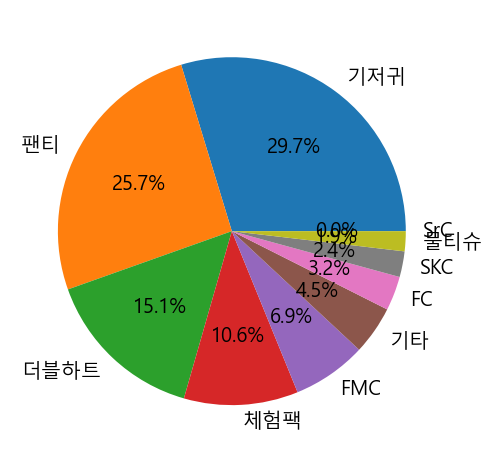

In [70]:
plt.pie(data = group_sum_over1, x = 'sales_percent', labels='물품대분류', autopct='%1.1f%%')

In [71]:
where_ = data.groupby('유입경로').agg(count = ('유입경로', 'count')).reset_index().sort_values(by = 'count', ascending = False)
where_['percent'] = round(where_['count'] / 199583  * 100, 2)
where_

,유입경로,count,percent
6,인스타그램,76815,38.49
1,네이버블로그,56494,28.31
0,검색광고,19918,9.98
7,지인추천,19544,9.79
2,네이버카페,14105,7.07
4,오픈마켓,5138,2.57
9,페이스북,3318,1.66
8,직접검색,2711,1.36
3,매장쿠폰,1002,0.50
5,이마트,538,0.27


([<matplotlib.patches.Wedge at 0x29f1091f280>,
 [Text(0.3891456596763379, 1.028866199053632, '인스타그램'),
  Text(-1.0848444124000156, -0.1819686810538142, '네이버블로그'),
  Text(-0.22035851203868892, -1.077702243744577, '검색광고'),
  Text(0.4479360415232843, -1.0046657666629488, '지인추천'),
  Text(0.8941646507637699, -0.6406789970995659, '네이버카페'),
  Text(1.0445485888019308, -0.3448452488173429, '오픈마켓'),
  Text(1.0810305116536525, -0.20340362060160655, '페이스북'),
  Text(1.0954379282517146, -0.10007869577283339, '직접검색'),
  Text(1.0994129135849453, -0.035933903804922576, '매장쿠폰'),
  Text(1.0999604239818448, -0.009330898867751443, '이마트')],
 [Text(0.2122612689143661, 0.5611997449383447, '38.5%'),
  Text(-0.5917333158545539, -0.09925564421117136, '28.3%'),
  Text(-0.12019555202110302, -0.5878375874970418, '10.0%'),
  Text(0.2443287499217914, -0.5479995090888811, '9.8%'),
  Text(0.48772617314387445, -0.3494612711452177, '7.1%'),
  Text(0.569753775710144, -0.18809740844582337, '2.6%'),
  Text(0.589653006356537

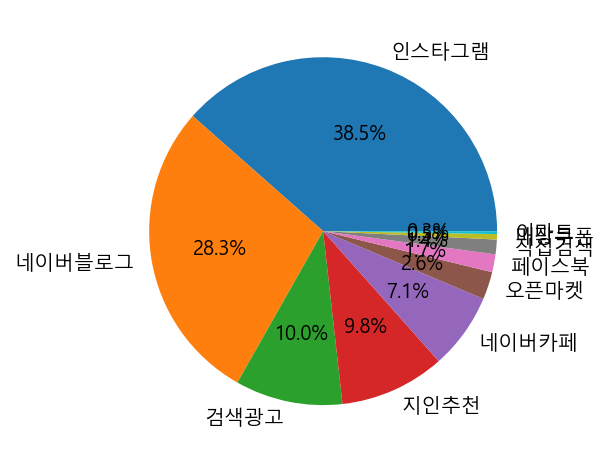

In [72]:
plt.pie(data = where_, x = 'percent', labels='유입경로', autopct='%1.1f%%')

In [73]:
group_sum_zero = count_zero.groupby('물품대분류').agg(sum_data_over1 = ('결제금액', 'sum'))
group_sum_zero

,sum_data_over1
물품대분류,
FC,39035203
FMC,188318689
SKC,76953049
SrC,44640
기저귀,1088664467
기타,52771031
더블하트,392829447
물티슈,103426927
체험팩,5677185


<AxesSubplot:xlabel='물품대분류', ylabel='margin'>

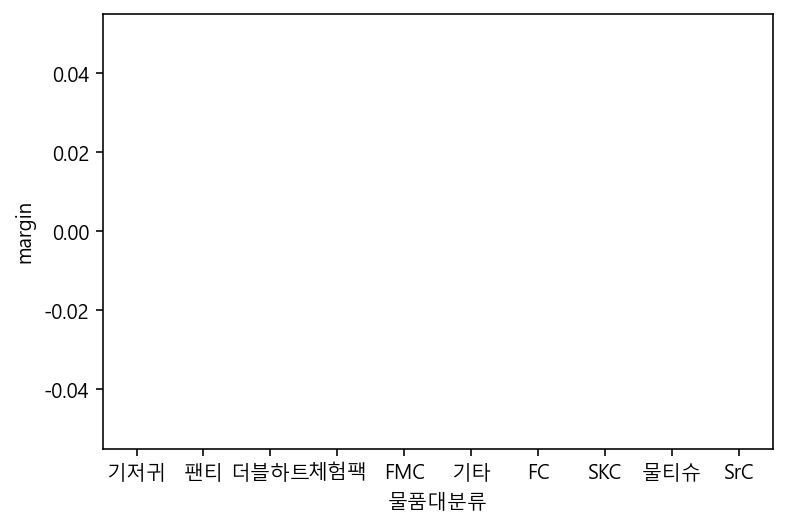

In [74]:
total_sep = pd.concat([group_sum_over1, group_sum_zero], axis = 1)
total_sep['margin'] = total_sep['sum_data_over1'] - total_sep['sum_data']
total_sep = total_sep.sort_values(by = 'margin', ascending = False).reset_index()

sns.barplot(data=total_sep, x = '물품대분류', y = 'margin')

In [75]:
data[data['물품대분류'] == '기저귀']

,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,성별,...,거주지역,연령,결제등록카드,유입경로,자녀여부,제품단가,배송기간,구매에서 배송완료까지,배송시작기간,물품구매량
3464,2019-05-13,2019-05-14,2019-05-16,66.0,2.018123e+14,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1,...,부산,32.0,하나은행,네이버블로그,1,65117,2 days,3 days,1 days,0.0
3465,2019-04-16,2019-04-17,2019-04-19,1.0,2.019010e+14,59520,40689,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1,...,전북,29.0,기업은행,지인추천,1,65117,2 days,3 days,1 days,0.0
3466,2019-12-15,2019-12-16,2019-12-19,8.0,2.019010e+14,59520,35968,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1,...,대구,35.0,신한카드,네이버블로그,0,65117,3 days,4 days,1 days,0.0
3467,2019-08-01,2019-08-02,2019-08-04,6.0,2.019010e+14,119040,81464,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1,...,대구,34.0,하나은행,인스타그램,0,65117,2 days,3 days,1 days,1.0
3468,2019-05-17,2019-05-18,2019-05-20,4.0,2.019011e+14,59520,43227,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1,...,서울,38.0,농협회원조합,네이버블로그,1,65117,2 days,3 days,1 days,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199545,2020-04-06,2020-04-07,2020-04-09,1.0,2.019121e+14,178560,123151,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형) X 3,1,...,경기,32.0,새마을금고,인스타그램,1,178560,2 days,3 days,1 days,1.0
199546,2020-04-06,2020-04-07,2020-04-10,3.0,2.019123e+14,178560,121035,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형) X 3,1,...,서울,28.0,롯데카드,인스타그램,1,178560,3 days,4 days,1 days,1.0
199557,2020-05-14,2020-05-15,2020-05-18,5.0,2.019122e+14,0,0,기저귀,하기스 NEW 네이처메이드 썸머 3단계 공용 120매(밴드형) X 3,1,...,경기,34.0,신협중앙회,검색광고,1,0,3 days,4 days,1 days,NaN
199569,2020-04-13,2020-04-14,2020-04-17,0.0,2.019122e+14,169200,111883,기저귀,NEW 하기스 네이처메이드 1단계 공용 186매(밴드형) X3,0,...,서울,38.0,신한은행,네이버카페,1,169200,3 days,4 days,1 days,1.0


In [76]:
data[data['물품대분류'] == '팬티']

,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,성별,...,거주지역,연령,결제등록카드,유입경로,자녀여부,제품단가,배송기간,구매에서 배송완료까지,배송시작기간,물품구매량
2761,2020-02-20,2020-02-21,2020-02-23,14.0,2.018123e+14,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,...,인천,37.0,국민은행,인스타그램,1,53648,2 days,3 days,1 days,0.0
2762,2020-03-31,2020-04-01,2020-04-04,21.0,2.019010e+14,51200,34637,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,...,서울,32.0,롯데카드,인스타그램,1,53648,3 days,4 days,1 days,0.0
2763,2020-03-08,2020-03-09,2020-03-13,14.0,2.019011e+14,51200,33508,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,...,경북,33.0,신한은행,인스타그램,1,53648,4 days,5 days,1 days,0.0
2764,2020-07-21,2020-07-22,2020-07-24,18.0,2.019011e+14,44300,22570,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,...,경북,33.0,신한은행,인스타그램,1,53648,2 days,3 days,1 days,0.0
2765,2020-02-06,2020-02-07,2020-02-09,10.0,2.019011e+14,51200,34051,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,...,서울,34.0,기업은행,검색광고,1,53648,2 days,3 days,1 days,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199500,2020-05-28,2020-05-29,2020-05-31,4.0,2.019122e+14,77900,49208,팬티,하기스 네이처메이드 오가닉 3단계 남아 128매(밴드형),1,...,제주,33.0,우리은행,인스타그램,1,77900,2 days,3 days,1 days,1.0
199529,2020-07-09,2020-07-10,2020-07-12,0.0,2.019112e+14,0,0,팬티,하기스 네이처메이드 밤부 4단계 여아 120매(밴드형) X2,1,...,서울,31.0,농협회원조합,네이버블로그,1,0,2 days,3 days,1 days,NaN
199531,2019-12-06,2019-12-07,2019-12-09,24.0,2.019113e+14,142080,91773,팬티,하기스 맥스드라이 팬티 5단계 여아 80매(팬티형) X3,1,...,전남,33.0,농협회원조합,인스타그램,1,142080,2 days,3 days,1 days,1.0
199532,2019-12-07,2019-12-08,2019-12-10,23.0,2.019121e+14,142080,92700,팬티,하기스 맥스드라이 팬티 5단계 여아 80매(팬티형) X3,1,...,서울,33.0,롯데카드,인스타그램,1,142080,2 days,3 days,1 days,1.0


In [77]:
data.groupby(['고객번호']).agg(count = ('고객번호', 'count'))

,count
고객번호,
2.018123e+14,2
2.018123e+14,1
2.018123e+14,1
2.018123e+14,2
2.018123e+14,1
...,...
2.019123e+14,1
2.019123e+14,2
2.019123e+14,4


In [78]:
produt_total = product_data.groupby('물품대분류').agg(product_storage = ('물품판매량', 'sum'))

In [79]:
def zero_change(x):
    if x == 0:
        return 1
    else:
        return x

data['물품구매량'] = data['물품구매량'].apply(zero_change)

In [80]:
customer_total = data.groupby('물품대분류').agg(customer_needs = ('물품구매량', 'sum'))

In [81]:
total_sells = pd.concat([produt_total, customer_total], axis = 1)

In [82]:
total_sells= total_sells.reset_index()
total_sells['shortage'] = total_sells['product_storage'] - total_sells['customer_needs']


In [83]:
product_detail = product_data.groupby('상품명').agg(check_produce_storage = ('물품판매량', 'sum'))
customer_detail = data.groupby('상품명').agg(check_customer_storage = ('물품구매량', 'sum'))
total_detail_data = pd.concat([product_detail, customer_detail],axis = 1)
customer_detail

,check_customer_storage
상품명,
(1+1) 좋은느낌 입는 오버나이트 대형 8개입,0.0
(1+1) 좋은느낌 입는 오버나이트 중형 8개입,0.0
(1+1) 크리넥스 버블버블 핸드워시 그린향 거품펌프형 250ml + 용기형리필 250ml X 2,0.0
(1+1) 크리넥스 버블버블 핸드워시 상큼향 거품펌프형 250ml + 용기형리필 250ml X 2,0.0
(1+1) 화이트 입는 오버나이트 대형 L 8개입 (EA),0.0
...,...
화이트 탐폰 오가닉 레귤러 14개입,7.0
화이트 탐폰 오가닉 슈퍼 14개입,6.0
화이트 한듯안한듯 팬티라이너 롱 36개입,32.0


In [84]:
total_detail_data['shortage'] = total_detail_data['check_produce_storage'] - total_detail_data['check_customer_storage']
total_detail_data[total_detail_data['shortage'] < 0]

,check_produce_storage,check_customer_storage,shortage
상품명,,,
2020 하기스 매직 컴포트 2단계 공용 246매(밴드형),493,499.0,-6.0
2020 하기스 매직 컴포트 4단계 공용 150매(밴드형),393,396.0,-3.0
2020 하기스 매직 컴포트 5단계 공용 126매(밴드형),121,122.0,-1.0
2020 하기스 매직팬티 컴포트 3단계 남아 160매(팬티형),233,234.0,-1.0
2020 하기스 매직팬티 컴포트 3단계 남아 160매(팬티형) + 보너스 16매 추가증정,96,98.0,-2.0
...,...,...,...
화이트 탐폰 레귤러 16개입,50,52.0,-2.0
화이트 탐폰 슈퍼 16개입,53,56.0,-3.0
화이트 탐폰 오가닉 레귤러 14개입,6,7.0,-1.0


In [85]:
data

,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,성별,...,거주지역,연령,결제등록카드,유입경로,자녀여부,제품단가,배송기간,구매에서 배송완료까지,배송시작기간,물품구매량
0,2019-05-06,2019-05-07,2019-05-11,4.0,2.018123e+14,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,...,인천,37.0,국민은행,인스타그램,1,20583,4 days,5 days,1 days,1.0
1,2019-01-01,2019-01-02,2019-01-04,1.0,2.018123e+14,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,...,강원,33.0,농협회원조합,인스타그램,1,20583,2 days,3 days,1 days,1.0
2,2019-04-14,2019-04-15,2019-04-18,2.0,2.018123e+14,25800,17344,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,...,대전,32.0,농협중앙회,네이버카페,1,20583,3 days,4 days,1 days,1.0
3,2019-05-21,2019-05-22,2019-05-25,0.0,2.018123e+14,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,...,제주,32.0,롯데카드,네이버카페,1,20583,3 days,4 days,1 days,1.0
4,2019-07-17,2019-07-18,2019-07-20,3.0,2.018123e+14,12900,9692,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,...,서울,31.0,국민은행,인스타그램,1,20583,2 days,3 days,1 days,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199578,2020-02-26,2020-02-27,2020-02-29,2.0,2.019123e+14,39600,39600,기타,[실리만] 실리콘 어린이 식탁매트(동물) WSB264-레몬,1,...,경기,31.0,우리은행,인스타그램,1,39600,2 days,3 days,1 days,1.0
199579,2020-03-05,2020-03-06,2020-03-08,2.0,2.019123e+14,39600,39600,기타,[실리만] 실리콘 어린이 식탁매트(동물) WSB264-하늘,1,...,경기,31.0,우리은행,인스타그램,1,39600,2 days,3 days,1 days,1.0
199580,2020-03-05,2020-03-06,2020-03-08,2.0,2.019123e+14,19800,19800,기타,[실리만] 실리콘 어린이 식판 WSB262 하늘,1,...,경기,31.0,우리은행,인스타그램,1,19800,2 days,3 days,1 days,1.0
199581,2020-03-06,2020-03-07,2020-03-09,2.0,2.019123e+14,19800,19800,기타,[실리만] 실리콘 어린이 식판 WSB262 하늘,1,...,경기,31.0,우리은행,인스타그램,1,19800,2 days,3 days,1 days,1.0


<AxesSubplot:>

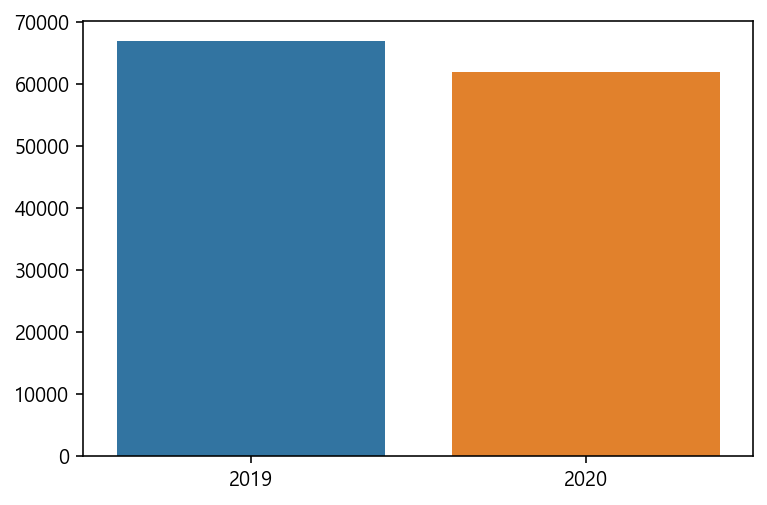

In [86]:
x = [2019, 2020]
y = [len(before_year), len(current_year)]
sns.barplot(x= x, y = y)

In [87]:
print(len(before_year), len(current_year))

66881 61876


In [88]:
data[data['물품대분류'] == '기저귀']['상품명'].nunique()

224

In [89]:
data[data['물품대분류'] == '팬티']

,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,성별,...,거주지역,연령,결제등록카드,유입경로,자녀여부,제품단가,배송기간,구매에서 배송완료까지,배송시작기간,물품구매량
2761,2020-02-20,2020-02-21,2020-02-23,14.0,2.018123e+14,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,...,인천,37.0,국민은행,인스타그램,1,53648,2 days,3 days,1 days,1.0
2762,2020-03-31,2020-04-01,2020-04-04,21.0,2.019010e+14,51200,34637,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,...,서울,32.0,롯데카드,인스타그램,1,53648,3 days,4 days,1 days,1.0
2763,2020-03-08,2020-03-09,2020-03-13,14.0,2.019011e+14,51200,33508,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,...,경북,33.0,신한은행,인스타그램,1,53648,4 days,5 days,1 days,1.0
2764,2020-07-21,2020-07-22,2020-07-24,18.0,2.019011e+14,44300,22570,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,...,경북,33.0,신한은행,인스타그램,1,53648,2 days,3 days,1 days,1.0
2765,2020-02-06,2020-02-07,2020-02-09,10.0,2.019011e+14,51200,34051,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,...,서울,34.0,기업은행,검색광고,1,53648,2 days,3 days,1 days,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199500,2020-05-28,2020-05-29,2020-05-31,4.0,2.019122e+14,77900,49208,팬티,하기스 네이처메이드 오가닉 3단계 남아 128매(밴드형),1,...,제주,33.0,우리은행,인스타그램,1,77900,2 days,3 days,1 days,1.0
199529,2020-07-09,2020-07-10,2020-07-12,0.0,2.019112e+14,0,0,팬티,하기스 네이처메이드 밤부 4단계 여아 120매(밴드형) X2,1,...,서울,31.0,농협회원조합,네이버블로그,1,0,2 days,3 days,1 days,NaN
199531,2019-12-06,2019-12-07,2019-12-09,24.0,2.019113e+14,142080,91773,팬티,하기스 맥스드라이 팬티 5단계 여아 80매(팬티형) X3,1,...,전남,33.0,농협회원조합,인스타그램,1,142080,2 days,3 days,1 days,1.0
199532,2019-12-07,2019-12-08,2019-12-10,23.0,2.019121e+14,142080,92700,팬티,하기스 맥스드라이 팬티 5단계 여아 80매(팬티형) X3,1,...,서울,33.0,롯데카드,인스타그램,1,142080,2 days,3 days,1 days,1.0


In [90]:
data[data['물품대분류'] == '기저귀']

,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,성별,...,거주지역,연령,결제등록카드,유입경로,자녀여부,제품단가,배송기간,구매에서 배송완료까지,배송시작기간,물품구매량
3464,2019-05-13,2019-05-14,2019-05-16,66.0,2.018123e+14,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1,...,부산,32.0,하나은행,네이버블로그,1,65117,2 days,3 days,1 days,1.0
3465,2019-04-16,2019-04-17,2019-04-19,1.0,2.019010e+14,59520,40689,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1,...,전북,29.0,기업은행,지인추천,1,65117,2 days,3 days,1 days,1.0
3466,2019-12-15,2019-12-16,2019-12-19,8.0,2.019010e+14,59520,35968,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1,...,대구,35.0,신한카드,네이버블로그,0,65117,3 days,4 days,1 days,1.0
3467,2019-08-01,2019-08-02,2019-08-04,6.0,2.019010e+14,119040,81464,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1,...,대구,34.0,하나은행,인스타그램,0,65117,2 days,3 days,1 days,1.0
3468,2019-05-17,2019-05-18,2019-05-20,4.0,2.019011e+14,59520,43227,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1,...,서울,38.0,농협회원조합,네이버블로그,1,65117,2 days,3 days,1 days,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199545,2020-04-06,2020-04-07,2020-04-09,1.0,2.019121e+14,178560,123151,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형) X 3,1,...,경기,32.0,새마을금고,인스타그램,1,178560,2 days,3 days,1 days,1.0
199546,2020-04-06,2020-04-07,2020-04-10,3.0,2.019123e+14,178560,121035,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형) X 3,1,...,서울,28.0,롯데카드,인스타그램,1,178560,3 days,4 days,1 days,1.0
199557,2020-05-14,2020-05-15,2020-05-18,5.0,2.019122e+14,0,0,기저귀,하기스 NEW 네이처메이드 썸머 3단계 공용 120매(밴드형) X 3,1,...,경기,34.0,신협중앙회,검색광고,1,0,3 days,4 days,1 days,NaN
199569,2020-04-13,2020-04-14,2020-04-17,0.0,2.019122e+14,169200,111883,기저귀,NEW 하기스 네이처메이드 1단계 공용 186매(밴드형) X3,0,...,서울,38.0,신한은행,네이버카페,1,169200,3 days,4 days,1 days,1.0


In [91]:
data['물품구매량'] = data['물품구매량'].fillna(1)


##### 쿼터별 데이터가 필요하여 쿼터 데이터 전처리

In [92]:
def quater(x):
    if x <= '2019-03':
        return '2019 1Q'
    elif x <= '2019-06':
        return '2019 2Q'
    elif x <= '2019-09':
        return '2019 3Q'
    elif x <= '2019-12':
        return '2019 4Q'
    elif x <= '2020-03':
        return '2020 1Q'
    elif x <= '2020-06':
        return '2020 2Q'
    else:
        return '2020 3Q'

data[data['구매일'] <= '2019-03']

,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,성별,...,거주지역,연령,결제등록카드,유입경로,자녀여부,제품단가,배송기간,구매에서 배송완료까지,배송시작기간,물품구매량
1,2019-01-01,2019-01-02,2019-01-04,1.0,2.018123e+14,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,...,강원,33.0,농협회원조합,인스타그램,1,20583,2 days,3 days,1 days,1.0
7,2019-01-01,2019-01-02,2019-01-04,4.0,2.018123e+14,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,...,경기,36.0,새마을금고,인스타그램,0,20583,2 days,3 days,1 days,1.0
12,2019-01-05,2019-01-06,2019-01-08,0.0,2.019010e+14,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,...,서울,35.0,광주은행,네이버블로그,1,20583,2 days,3 days,1 days,1.0
13,2019-02-28,2019-03-01,2019-03-03,3.0,2.019010e+14,12900,8157,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,...,서울,34.0,국민카드,네이버블로그,1,20583,2 days,3 days,1 days,1.0
24,2019-02-22,2019-02-23,2019-02-26,2.0,2.019010e+14,25800,18234,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),1,...,경기,34.0,롯데카드,인스타그램,1,20583,3 days,4 days,1 days,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195750,2019-02-14,2019-02-15,2019-02-18,0.0,2.019021e+14,18500,14652,기타,티엔 BT21 AC컨트롤 데일리 모이스춰 로션 190ml,1,...,충남,37.0,신한카드,인스타그램,1,18500,3 days,4 days,1 days,1.0
195752,2019-02-24,2019-02-25,2019-02-27,107.0,2.019022e+14,18500,14652,기타,티엔 BT21 AC컨트롤 데일리 모이스춰 로션 190ml,1,...,경북,30.0,우리은행,인스타그램,1,18500,2 days,3 days,1 days,1.0
196188,2019-02-13,2019-02-14,2019-02-17,203.0,2.019021e+14,38900,38511,기타,[테스] ES-001 미세가습 360도 컬링 가습기,1,...,충남,34.0,신한카드,검색광고,1,38900,3 days,4 days,1 days,1.0
196509,2019-02-22,2019-02-23,2019-02-25,80.0,2.019022e+14,9900,9801,기타,[실리만] 실리콘 머핀 빵틀(소) 12P WSK570,1,...,광주,36.0,농협회원조합,네이버블로그,1,9700,2 days,3 days,1 days,1.0


In [93]:
data['쿼터별'] = data['구매일'].apply(quater)
quater_customer = data.groupby('쿼터별').agg(count = ('쿼터별', 'count')).reset_index()
quater_customer

,쿼터별,count
0,2019 1Q,11515
1,2019 2Q,27450
2,2019 3Q,38101
3,2019 4Q,42436
4,2020 1Q,41677
5,2020 2Q,24883
6,2020 3Q,13521


<AxesSubplot:xlabel='쿼터별', ylabel='count'>

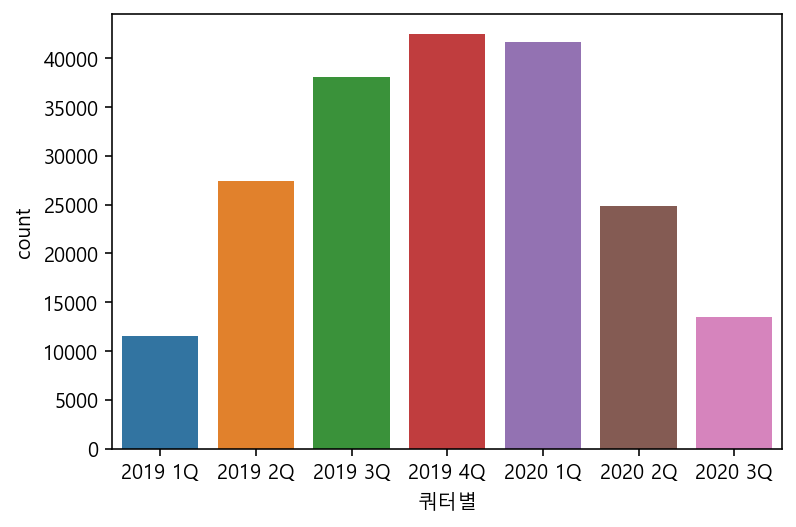

In [94]:
sns.barplot(data=quater_customer, x = '쿼터별', y = 'count')

In [95]:
df_penty = data[data['물품대분류'] == '팬티']
df_diaper = data[data['물품대분류'] == '기저귀']

##### 기저귀 초점을 맞추기 위해 평균 37개월로 data 재조정

In [96]:
# 이상치 제거를 위해 구매시 월령대를 6살이하로 조정
data_diaper = pd.concat([df_penty, df_diaper])
data_diaper = data_diaper[data_diaper['구매시월령(수정)'] <= 37]
data_diaper


,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,성별,...,연령,결제등록카드,유입경로,자녀여부,제품단가,배송기간,구매에서 배송완료까지,배송시작기간,물품구매량,쿼터별
2761,2020-02-20,2020-02-21,2020-02-23,14.0,2.018123e+14,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,...,37.0,국민은행,인스타그램,1,53648,2 days,3 days,1 days,1.0,2020 1Q
2762,2020-03-31,2020-04-01,2020-04-04,21.0,2.019010e+14,51200,34637,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,...,32.0,롯데카드,인스타그램,1,53648,3 days,4 days,1 days,1.0,2020 2Q
2763,2020-03-08,2020-03-09,2020-03-13,14.0,2.019011e+14,51200,33508,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,...,33.0,신한은행,인스타그램,1,53648,4 days,5 days,1 days,1.0,2020 2Q
2764,2020-07-21,2020-07-22,2020-07-24,18.0,2.019011e+14,44300,22570,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,...,33.0,신한은행,인스타그램,1,53648,2 days,3 days,1 days,1.0,2020 3Q
2765,2020-02-06,2020-02-07,2020-02-09,10.0,2.019011e+14,51200,34051,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,...,34.0,기업은행,검색광고,1,53648,2 days,3 days,1 days,1.0,2020 1Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199545,2020-04-06,2020-04-07,2020-04-09,1.0,2.019121e+14,178560,123151,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형) X 3,1,...,32.0,새마을금고,인스타그램,1,178560,2 days,3 days,1 days,1.0,2020 2Q
199546,2020-04-06,2020-04-07,2020-04-10,3.0,2.019123e+14,178560,121035,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형) X 3,1,...,28.0,롯데카드,인스타그램,1,178560,3 days,4 days,1 days,1.0,2020 2Q
199557,2020-05-14,2020-05-15,2020-05-18,5.0,2.019122e+14,0,0,기저귀,하기스 NEW 네이처메이드 썸머 3단계 공용 120매(밴드형) X 3,1,...,34.0,신협중앙회,검색광고,1,0,3 days,4 days,1 days,1.0,2020 2Q
199569,2020-04-13,2020-04-14,2020-04-17,0.0,2.019122e+14,169200,111883,기저귀,NEW 하기스 네이처메이드 1단계 공용 186매(밴드형) X3,0,...,38.0,신한은행,네이버카페,1,169200,3 days,4 days,1 days,1.0,2020 2Q


##### 각 쿼터별 배송지연율

In [97]:
first_2019 = data[data['쿼터별'] =='2019 1Q']
delay_first_2019 = first_2019[first_2019['배송기간'] >= '3 days']
delay_2019_1Q = len(delay_first_2019) / len(first_2019) * 100
print(delay_2019_1Q, len(delay_first_2019))

29.674337820234477 3417


In [98]:
second_2019 = data[data['쿼터별'] =='2019 2Q']
delay_second_2019 = second_2019[second_2019['배송기간'] >= '3 days']
delay_2019_2Q = len(delay_second_2019) / len(second_2019) * 100
print(delay_2019_2Q, len(delay_second_2019))

29.93806921675774 8218


In [99]:
third_2019 = data[data['쿼터별'] =='2019 3Q']
delay_third_2019 = third_2019[third_2019['배송기간'] >= '3 days']
delay_2019_3Q = len(delay_third_2019) / len(third_2019) * 100
print(delay_2019_3Q, len(delay_third_2019))

29.9545943676019 11413


In [100]:
forth_2019 = data[data['쿼터별'] =='2019 4Q']
delay_forth_2019 = forth_2019[forth_2019['배송기간'] >= '3 days']
delay_2019_4Q = len(delay_forth_2019) / len(forth_2019) * 100
print(delay_2019_4Q, len(delay_forth_2019))

30.052314072956925 12753


In [101]:
first_2020 = data[data['쿼터별'] =='2020 1Q']
delay_first_2020 = first_2020[first_2020['배송기간'] >= '3 days']
delay_2020_1Q = len(delay_first_2020) / len(first_2020) * 100
print(delay_2020_1Q, len(delay_first_2020))

30.172517215730497 12575


In [102]:
second_2020 = data[data['쿼터별'] =='2020 2Q']
delay_second_2020 = second_2020[second_2020['배송기간'] >= '3 days']
delay_2020_2Q = len(delay_second_2020) / len(second_2020) * 100
print(delay_2020_2Q, len(delay_second_2020))

30.73986255676566 7649


<AxesSubplot:>

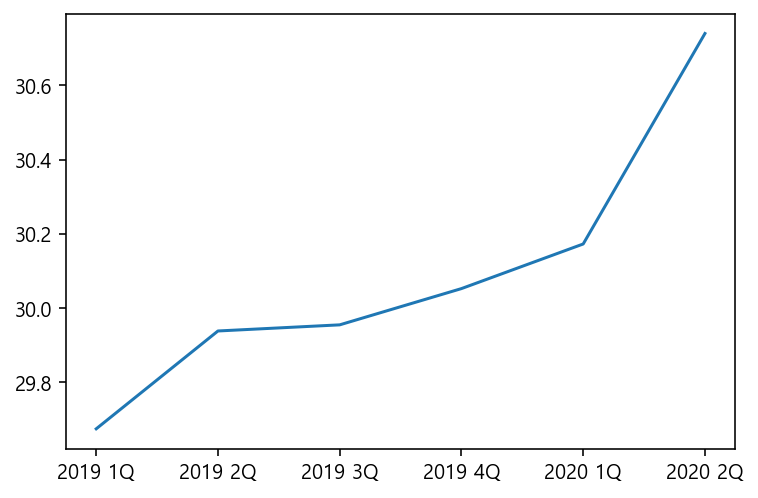

In [103]:
x = ['2019 1Q', '2019 2Q', '2019 3Q', '2019 4Q', '2020 1Q', '2020 2Q']
y = [delay_2019_1Q, delay_2019_2Q, delay_2019_3Q, delay_2019_4Q, delay_2020_1Q, delay_2020_2Q]

sns.lineplot(x = x, y = y)

##### 쿼터별 대분류 제품 판매액

<AxesSubplot:xlabel='쿼터별', ylabel='total_sales'>

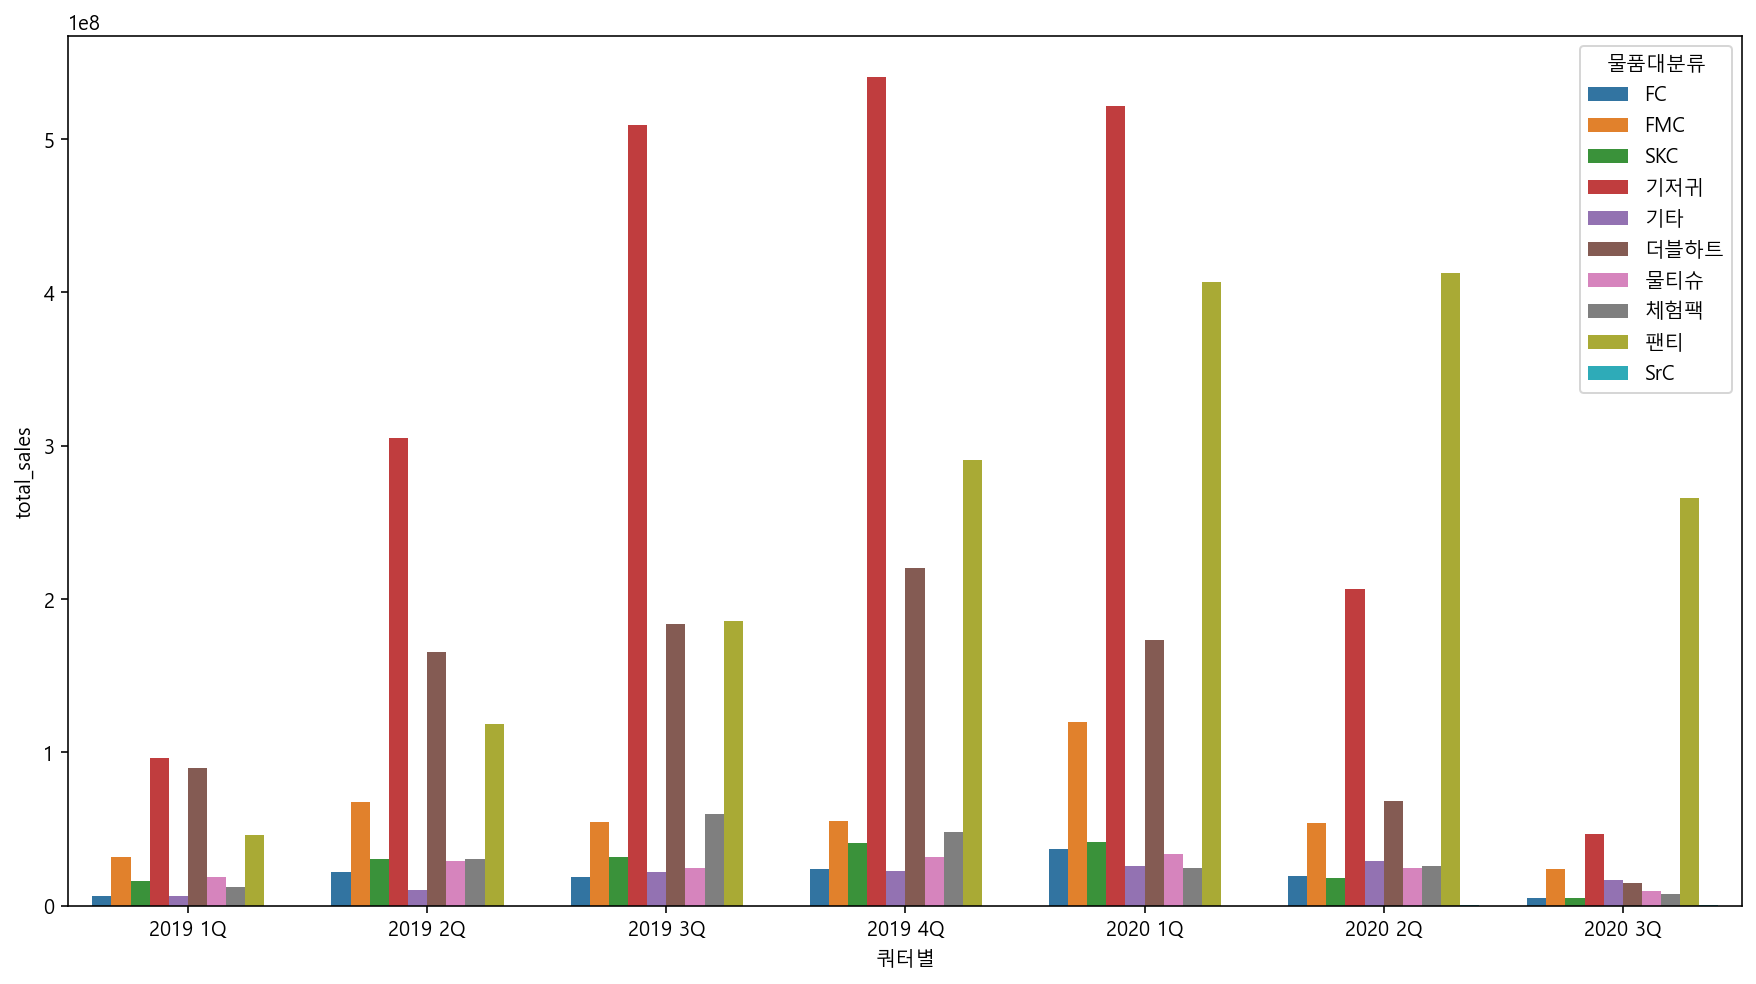

In [104]:
fig = plt.figure(figsize=(15,8))

total_sales = data.groupby(['쿼터별', '물품대분류']).agg(total_sales = ('구매금액', 'sum')).reset_index()

sns.barplot(data = total_sales, x = '쿼터별', y= 'total_sales', hue = '물품대분류')

In [105]:
# 상품명 X 3, X 2 있는거 삭제하는방법
# data_diaper['상품명'] = data_diaper['상품명'].replace('(.*)X 3(.*)', '', regex=True).replace('(.*)X 2(.*)', '', regex=True).replace('(.*)X3(.*)', '', regex=True).replace('(.*)X2(.*)', '', regex=True)
# data_diaper[data_diaper['상품명'].str.contains('X 3')]

In [106]:
customer_re = data_diaper.groupby(['고객번호', '상품명']).agg(count = ('고객번호', 'count'))
customer_re[customer_re['count'] >= 2]

count
고객번호         상품명                                        
2.018123e+14 하기스 네이처메이드 2단계 남아 156매(밴드형)               2
             하기스 네이처메이드 팬티 4단계 남아 96매(팬티형)             2
             하기스 매직팬티 컴포트핏 5단계 여아 120매(팬티형)            3
             하기스 네이처메이드 2단계 여아 156매(밴드형)               2
             하기스 네이처메이드 2단계 여아 156매(밴드형)               2
...                                                  ...
2.019123e+14 2020 하기스 매직 컴포트 3단계 공용 180매(밴드형)          2
             하기스 NEW 네이처메이드 썸머팬티 3단계 공용 104매(팬티형)      2
             하기스 네이처메이드 밤부 3단계 남아 144매(밴드형)            2
             하기스 NEW 네이처메이드 썸머 4단계 공용 96매(밴드형)         2
             하기스 네이처메이드 팬티 밤부 5단계 남아 88매(팬티형)          2

[6245 rows x 1 columns]

In [107]:
data_diaper['상품명'].nunique()

554

In [108]:
data_diaper.groupby('상품명').agg(sum_values = ('물품구매량', 'sum'))

,sum_values
상품명,
2020 하기스 매직 컴포트 1단계 공용 264매,1.0
2020 하기스 매직 컴포트 1단계 공용 264매(밴드형),80.0
2020 하기스 매직 컴포트 1단계 공용 264매(밴드형) X2,2.0
2020 하기스 매직 컴포트 1단계 공용 264매(밴드형) X3,4.0
2020 하기스 매직 컴포트 2단계 공용 246매,11.0
...,...
하기스 에어솔솔 팬티 5단계 남아용 80매(팬티형),80.0
하기스 에어솔솔 팬티 5단계 여아용 80매(팬티형),33.0
하기스 크린베베 순면감촉 대형 216매,2.0


<AxesSubplot:xlabel='쿼터별', ylabel='total_sales'>

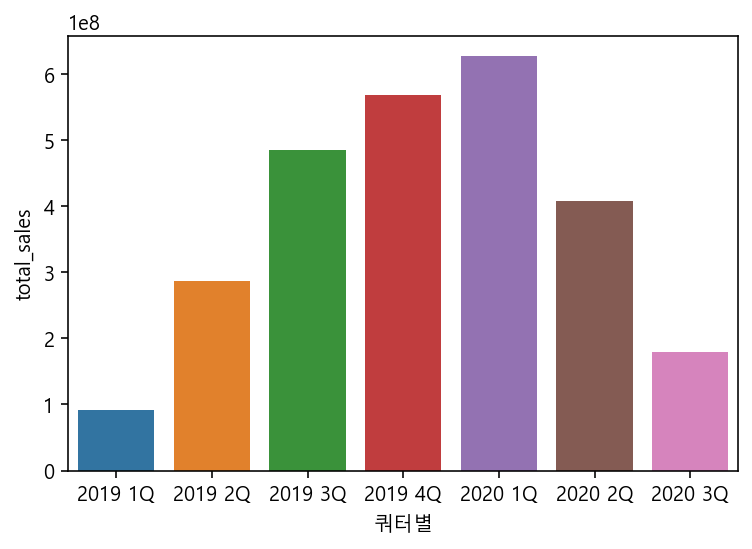

In [109]:
quater_data = data_diaper.groupby('쿼터별').agg(total_sales = ('결제금액', 'sum')).reset_index()
sns.barplot(data = quater_data, x = '쿼터별', y = 'total_sales')

In [110]:
quater_data

,쿼터별,total_sales
0,2019 1Q,91299813
1,2019 2Q,286358730
2,2019 3Q,485183630
3,2019 4Q,567958918
4,2020 1Q,626375116
5,2020 2Q,407021085
6,2020 3Q,179829456


##### 쿼터별 고객 이용수

In [111]:
quater_customer = data_diaper.groupby('쿼터별').agg(total_customer = ('고객번호', 'count')).reset_index()

In [112]:
quater_customer

,쿼터별,total_customer
0,2019 1Q,2029
1,2019 2Q,6238
2,2019 3Q,10907
3,2019 4Q,12818
4,2020 1Q,13600
5,2020 2Q,9337
6,2020 3Q,5739


<AxesSubplot:xlabel='쿼터별', ylabel='total_customer'>

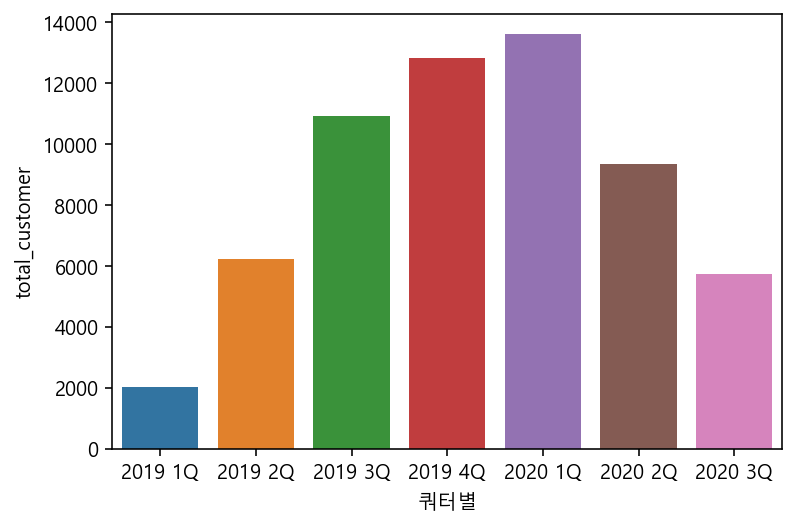

In [113]:
sns.barplot(data=quater_customer, x = '쿼터별', y ='total_customer')

In [114]:
quater_user = data.groupby('쿼터별').agg(total_count = ('고객번호', 'count')).reset_index()
quater_user

,쿼터별,total_count
0,2019 1Q,11515
1,2019 2Q,27450
2,2019 3Q,38101
3,2019 4Q,42436
4,2020 1Q,41677
5,2020 2Q,24883
6,2020 3Q,13521


<AxesSubplot:xlabel='쿼터별', ylabel='total_count'>

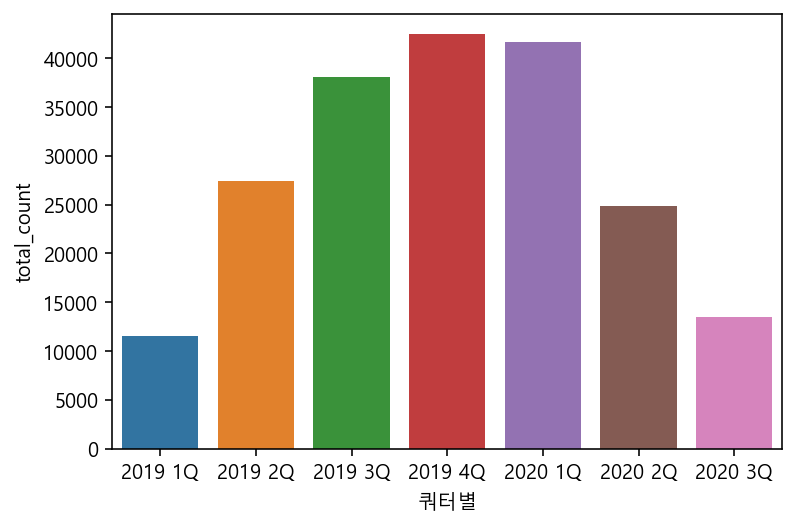

In [115]:
sns.barplot(data=quater_user, x = '쿼터별', y = 'total_count')

In [116]:
level_four = df_diaper[df_diaper['상품명'].str.contains('4단계')]
level_four['구매시월령(수정)'].mean()

9.99851253718657

In [117]:
level_five = df_diaper[df_diaper['상품명'].str.contains('5단계')]
level_five['구매시월령(수정)'].mean()

15.444139194139193

##### 전체 배송 지연율

In [118]:
# 배송기간 퍼센트
delay_deliver = data[data['배송기간'] > '2 days']
delay_deliver_percent = len(delay_deliver) / len(data) * 100
delay_deliver_percent

30.077712029581676

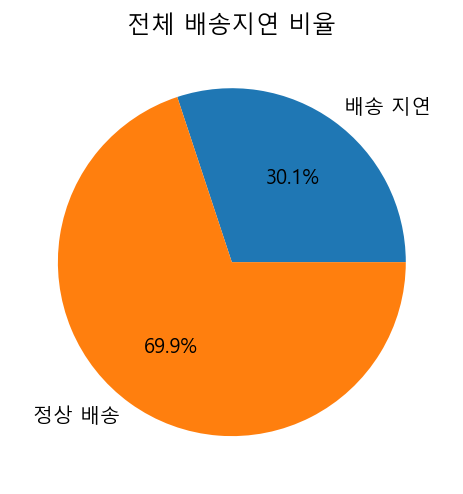

In [119]:
#배송 지연 퍼센트 Pit plot
x = ['배송 지연', '정상 배송']
y = [round(delay_deliver_percent, 2), 100 - round(delay_deliver_percent, 2)]

plt.title("전체 배송지연 비율")
plt.pie(y, labels=x, autopct='%1.1f%%')
plt.show()

In [120]:
first_diaper = data_diaper[data_diaper['상품명'].str.contains('1단')]
first_diapers = first_diaper[first_diaper['구매시월령(수정)'] <= 1]
mean_first = first_diapers['구매시월령(수정)'].mean()
outlier_first = first_diaper[first_diaper['구매시월령(수정)'] >= 1]
outlier_first['구매시월령(수정)']  = round(mean_first, 0)
outlier_first

C:\Users\Song\AppData\Local\Temp\ipykernel_20388\1458536627.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_first['구매시월령(수정)']  = round(mean_first, 0)


,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,성별,...,연령,결제등록카드,유입경로,자녀여부,제품단가,배송기간,구매에서 배송완료까지,배송시작기간,물품구매량,쿼터별
157974,2020-07-01,2020-07-02,2020-07-04,0.0,2.019010e+14,48900,29084,팬티,NEW 하기스 네이처메이드 1단계 공용 186매(밴드형),1,...,30.0,농협회원조합,검색광고,0,50071,2 days,3 days,1 days,1.0,2020 3Q
157975,2020-07-09,2020-07-10,2020-07-12,0.0,2.019010e+14,48900,21224,팬티,NEW 하기스 네이처메이드 1단계 공용 186매(밴드형),1,...,34.0,농협회원조합,네이버블로그,1,50071,2 days,3 days,1 days,1.0,2020 3Q
157976,2020-07-20,2020-07-21,2020-07-25,0.0,2.019011e+14,48900,25586,팬티,NEW 하기스 네이처메이드 1단계 공용 186매(밴드형),1,...,34.0,농협회원조합,검색광고,1,50071,4 days,5 days,1 days,1.0,2020 3Q
157977,2020-07-09,2020-07-10,2020-07-13,0.0,2.019011e+14,48900,21224,팬티,NEW 하기스 네이처메이드 1단계 공용 186매(밴드형),1,...,34.0,신한은행,네이버블로그,1,50071,3 days,4 days,1 days,1.0,2020 3Q
157978,2020-07-24,2020-07-25,2020-07-28,0.0,2.019011e+14,48900,21224,팬티,NEW 하기스 네이처메이드 1단계 공용 186매(밴드형),1,...,34.0,신한은행,네이버블로그,1,50071,3 days,4 days,1 days,1.0,2020 3Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196268,2019-04-09,2019-04-10,2019-04-13,0.0,2.019033e+14,52080,35046,기저귀,"[쿠폰적용가37,490원] 하기스 매직핏 기저귀 1단계 공용 210매(밴드형)",1,...,35.0,국민은행,네이버카페,1,52080,3 days,4 days,1 days,1.0,2019 2Q
196678,2020-02-11,2020-02-12,2020-02-16,0.0,2.019082e+14,104640,72581,기저귀,하기스 네이처메이드 1단계 공용 186매(밴드형) X2,1,...,30.0,롯데카드,인스타그램,1,104640,4 days,5 days,1 days,1.0,2020 1Q
197479,2020-01-12,2020-01-13,2020-01-16,0.0,2.019051e+14,214500,125883,기저귀,2020 하기스 매직 컴포트 1단계 공용 264매(밴드형) X3,1,...,40.0,하나은행,검색광고,0,214500,3 days,4 days,1 days,1.0,2020 1Q
198078,2020-01-09,2020-01-10,2020-01-12,0.0,2.019031e+14,143000,89917,기저귀,2020 하기스 매직 컴포트 1단계 공용 264매(밴드형) X2,1,...,38.0,국민은행,네이버카페,1,143000,2 days,3 days,1 days,1.0,2020 1Q


In [121]:
second_diaper = data_diaper[data_diaper['상품명'].str.contains('2단')]
second_diapers = second_diaper[second_diaper['구매시월령(수정)'] <= 2]
mean_second = second_diapers['구매시월령(수정)'].mean()
mean_second
# first_diapers = first_diaper[first_diaper['구매시월령(수정)'] <= 1]
# mean_first = first_diapers['구매시월령(수정)'].mean()
# outlier_first = first_diaper[first_diaper['구매시월령(수정)'] >= 1]
# outlier_first['구매시월령(수정)']  = round(mean_first, 0)
# outlier_first

0.8639301874595993

##### 제품 세부분류를 위한 컬럼형성
- 아이 성별 구분
- 기저귀 단계 구분
- 제품 상세 분류

In [122]:
# child_data = data_diaper[data_diaper['구매시월령(수정)'] >= 0]
excpet_child = data_diaper[~data_diaper['상품명'].str.contains('핑크퐁')]
kids_men = excpet_child[excpet_child['상품명'].str.contains('남아')]
kids_girl = excpet_child[excpet_child['상품명'].str.contains('여아')]
kids_common = excpet_child[excpet_child['상품명'].str.contains('공용')]
kids_men['child_sex'] = '남아'
kids_girl['child_sex'] = '여아'
kids_common['child_sex'] = '공용'
child_df = pd.concat([kids_men, kids_girl, kids_common])
child_df

C:\Users\Song\AppData\Local\Temp\ipykernel_20388\330329113.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kids_men['child_sex'] = '남아'
C:\Users\Song\AppData\Local\Temp\ipykernel_20388\330329113.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kids_girl['child_sex'] = '여아'
C:\Users\Song\AppData\Local\Temp\ipykernel_20388\330329113.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,성별,...,결제등록카드,유입경로,자녀여부,제품단가,배송기간,구매에서 배송완료까지,배송시작기간,물품구매량,쿼터별,child_sex
2761,2020-02-20,2020-02-21,2020-02-23,14.0,2.018123e+14,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,...,국민은행,인스타그램,1,53648,2 days,3 days,1 days,1.0,2020 1Q,남아
2762,2020-03-31,2020-04-01,2020-04-04,21.0,2.019010e+14,51200,34637,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,...,롯데카드,인스타그램,1,53648,3 days,4 days,1 days,1.0,2020 2Q,남아
2763,2020-03-08,2020-03-09,2020-03-13,14.0,2.019011e+14,51200,33508,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,...,신한은행,인스타그램,1,53648,4 days,5 days,1 days,1.0,2020 2Q,남아
2764,2020-07-21,2020-07-22,2020-07-24,18.0,2.019011e+14,44300,22570,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,...,신한은행,인스타그램,1,53648,2 days,3 days,1 days,1.0,2020 3Q,남아
2765,2020-02-06,2020-02-07,2020-02-09,10.0,2.019011e+14,51200,34051,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1,...,기업은행,검색광고,1,53648,2 days,3 days,1 days,1.0,2020 1Q,남아
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199461,2020-04-20,2020-04-21,2020-04-23,5.0,2.019102e+14,116000,84830,기저귀,그린핑거 기저귀 3단계 공용 132매(밴드형) X2,1,...,국민카드,인스타그램,0,116000,2 days,3 days,1 days,1.0,2020 2Q,공용
199530,2019-11-27,2019-11-28,2019-12-01,0.0,2.019113e+14,163440,106692,기저귀,하기스 네이처메이드 밤부 1단계 공용 186매(밴드형) X3,0,...,우리은행,네이버블로그,0,163440,3 days,4 days,1 days,1.0,2019 4Q,공용
199557,2020-05-14,2020-05-15,2020-05-18,5.0,2.019122e+14,0,0,기저귀,하기스 NEW 네이처메이드 썸머 3단계 공용 120매(밴드형) X 3,1,...,신협중앙회,검색광고,1,0,3 days,4 days,1 days,1.0,2020 2Q,공용
199569,2020-04-13,2020-04-14,2020-04-17,0.0,2.019122e+14,169200,111883,기저귀,NEW 하기스 네이처메이드 1단계 공용 186매(밴드형) X3,0,...,신한은행,네이버카페,1,169200,3 days,4 days,1 days,1.0,2020 2Q,공용


In [123]:
first_diaper = child_df[child_df['상품명'].str.contains('1단')]
second_diaper = child_df[child_df['상품명'].str.contains('2단')]
third_diaper = child_df[child_df['상품명'].str.contains('3단')]
forth_diaper = child_df[child_df['상품명'].str.contains('4단')]
fifth_diaper = child_df[child_df['상품명'].str.contains('5단')]

In [124]:
first_diaper['기저귀 단계'] = 1
second_diaper['기저귀 단계'] = 2
third_diaper['기저귀 단계'] = 3
forth_diaper['기저귀 단계'] = 4
fifth_diaper['기저귀 단계'] = 5

C:\Users\Song\AppData\Local\Temp\ipykernel_20388\2582838680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_diaper['기저귀 단계'] = 1
C:\Users\Song\AppData\Local\Temp\ipykernel_20388\2582838680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_diaper['기저귀 단계'] = 2
C:\Users\Song\AppData\Local\Temp\ipykernel_20388\2582838680.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [125]:
sep_diaper = pd.concat([first_diaper, second_diaper, third_diaper, forth_diaper, fifth_diaper])
sep_diaper

,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,성별,...,유입경로,자녀여부,제품단가,배송기간,구매에서 배송완료까지,배송시작기간,물품구매량,쿼터별,child_sex,기저귀 단계
157974,2020-07-01,2020-07-02,2020-07-04,13.0,2.019010e+14,48900,29084,팬티,NEW 하기스 네이처메이드 1단계 공용 186매(밴드형),1,...,검색광고,0,50071,2 days,3 days,1 days,1.0,2020 3Q,공용,1
157975,2020-07-09,2020-07-10,2020-07-12,5.0,2.019010e+14,48900,21224,팬티,NEW 하기스 네이처메이드 1단계 공용 186매(밴드형),1,...,네이버블로그,1,50071,2 days,3 days,1 days,1.0,2020 3Q,공용,1
157976,2020-07-20,2020-07-21,2020-07-25,21.0,2.019011e+14,48900,25586,팬티,NEW 하기스 네이처메이드 1단계 공용 186매(밴드형),1,...,검색광고,1,50071,4 days,5 days,1 days,1.0,2020 3Q,공용,1
157977,2020-07-09,2020-07-10,2020-07-13,26.0,2.019011e+14,48900,21224,팬티,NEW 하기스 네이처메이드 1단계 공용 186매(밴드형),1,...,네이버블로그,1,50071,3 days,4 days,1 days,1.0,2020 3Q,공용,1
157978,2020-07-24,2020-07-25,2020-07-28,26.0,2.019011e+14,48900,21224,팬티,NEW 하기스 네이처메이드 1단계 공용 186매(밴드형),1,...,네이버블로그,1,50071,3 days,4 days,1 days,1.0,2020 3Q,공용,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198406,2020-01-20,2020-01-21,2020-01-23,6.0,2.019063e+14,130400,82080,기저귀,2020 하기스 매직 컴포트 5단계 공용 126매(밴드형) X2,1,...,인스타그램,1,130400,2 days,3 days,1 days,1.0,2020 1Q,공용,5
198407,2020-01-19,2020-01-20,2020-01-22,5.0,2.019100e+14,130400,86400,기저귀,2020 하기스 매직 컴포트 5단계 공용 126매(밴드형) X2,1,...,지인추천,1,130400,2 days,3 days,1 days,1.0,2020 1Q,공용,5
198408,2020-01-19,2020-01-20,2020-01-22,7.0,2.019100e+14,130400,86400,기저귀,2020 하기스 매직 컴포트 5단계 공용 126매(밴드형) X2,1,...,인스타그램,1,130400,2 days,3 days,1 days,1.0,2020 1Q,공용,5
198409,2020-01-19,2020-01-20,2020-01-23,10.0,2.019111e+14,130400,84384,기저귀,2020 하기스 매직 컴포트 5단계 공용 126매(밴드형) X2,1,...,인스타그램,1,130400,3 days,4 days,1 days,1.0,2020 1Q,공용,5


In [126]:
# 팬티 : 0, 기저귀 : 1

sep_diaper['물품대분류'] = sep_diaper['물품대분류'].replace('팬티', 0).replace('기저귀', 1)
sep_diaper.columns

Index(['구매일', '배송시작일', '배송완료일', '구매시월령(수정)', '고객번호', '구매금액', '결제금액', '물품대분류',
       '상품명', '성별', '결혼유무', '거주지역', '연령', '결제등록카드', '유입경로', '자녀여부', '제품단가',
       '배송기간', '구매에서 배송완료까지', '배송시작기간', '물품구매량', '쿼터별', 'child_sex', '기저귀 단계'],
      dtype='object')

In [127]:
sep_diaper.groupby('기저귀 단계').agg(mean_age = ('구매시월령(수정)', 'mean'), max_age = ('구매시월령(수정)', 'max'), min_age = ('구매시월령(수정)', 'min'), count = ('구매시월령(수정)', 'count'))

,mean_age,max_age,min_age,count
기저귀 단계,,,,
1,2.056958,37.0,0.0,3090
2,2.189123,37.0,0.0,11511
3,5.340476,37.0,0.0,20066
4,9.649580,37.0,0.0,15841
5,13.911114,37.0,0.0,7324


##### 기저귀 데이터

In [128]:
sep_diaper.to_csv('diaper.csv')

In [ ]:
count_customer = sep_diaper.groupby(['고객번호', '구매일']).agg(count = ('고객번호', 'count'))
# count_customer = count_customer[count_customer['count'] >= 2]
count_customer

In [ ]:
nature_diaper = child_df[child_df['상품명'].str.contains('썸머')]
# second_diaper = child_df[child_df['상품명'].str.contains('2단')]
# third_diaper = child_df[child_df['상품명'].str.contains('3단')]
# forth_diaper = child_df[child_df['상품명'].str.contains('4단')]
# fifth_diaper = child_df[child_df['상품명'].str.contains('5단')]

In [ ]:
nature_diaper

In [ ]:
# 37개월 이상 이상치 확인
box_test = sep_diaper[sep_diaper['구매시월령(수정)'] <= 37]

In [ ]:
sns.boxplot(data=box_test, x = '기저귀 단계', y = '구매시월령(수정)')

In [ ]:
# 세부상품 분류를 위해
# nature_made : 0
# magic_comport : 1
# max_dry : 2
# bosong_bosong : 3
nature_made = sep_diaper[sep_diaper['상품명'].str.contains('네이처메이드')]
magic_comport = sep_diaper[sep_diaper['상품명'].str.contains('매직')]
max_dry = sep_diaper[sep_diaper['상품명'].str.contains('맥스드라이')]
bosong_bosong = sep_diaper[sep_diaper['상품명'].str.contains('보송보송')]

In [ ]:
nature_made['세부상품명'] = '네이처메이드'
magic_comport['세부상품명'] = '매직컴포트'
max_dry['세부상품명'] = '맥스드라이'
bosong_bosong['세부상품명'] = '보송보송'

In [ ]:
data_diaper = pd.concat([nature_made, magic_comport, max_dry, bosong_bosong])
data_diaper

In [ ]:
sep_diaper['상품명'].unique()

In [ ]:
data_diaper['고객번호'] = data_diaper['고객번호'].astype('str')

In [ ]:
count_customer = data_diaper.groupby(['고객번호', '구매일']).agg(count = ('구매금액', 'count')).reset_index()
re_customer = count_customer[count_customer['count'] >= 2]

In [ ]:
max_buy_customer = data_diaper[data_diaper['고객번호'] == '201901020751222.0']
max_buy_customer.sort_values(by='구매일')

In [ ]:
data_diaper.info()

In [ ]:
re_customer['count'].max()

In [ ]:
country_side = data_diaper.groupby('거주지역').agg(countryside_sell = ('구매금액', 'sum'), customer_count = ('고객번호', 'count')).sort_values(by = 'customer_count', ascending = False).reset_index()
country_side['customer_sum'] =country_side['customer_count'].cumsum()
country_side['customer_percent'] = round(country_side['customer_count'] / 42780 * 100, 2)
country_side['customer_sum'] = country_side['countryside_sell'].cumsum()
country_side['customer_sell_percent'] = round(country_side['countryside_sell'] / 2684703420 * 100, 2)
country_side.drop('customer_sum', axis = 1, inplace = True)
country_side

In [ ]:
plt.pie(data=country_side, x = 'customer_sell_percent', labels='거주지역', autopct='%1.1f%%')

In [ ]:
quater_delay = data_diaper.groupby(['거주지역','배송기간', '쿼터별']).agg(count = ('배송기간', 'count')).reset_index()
quater_delay = quater_delay[quater_delay['배송기간'] > '2 days']
quater_delay[quater_delay['거주지역'] == '서울']
quater_delay[quater_delay['거주지역'] == '경기']
data_diaper[data_diaper['거주지역'] == '경기']

In [ ]:
have_child = data_diaper[data_diaper['자녀여부'] == 1]

In [ ]:
no_child = data_diaper[data_diaper['자녀여부'] == 0]
no_child

In [ ]:
count_no_child = no_child.groupby('고객번호').agg(count = ('고객번호', 'count'))
count_no_child[count_no_child['count'] >= 2]

In [ ]:
count_have_child = have_child.groupby('고객번호').agg(count = ('고객번호', 'count'))
count_have_child[count_have_child['count'] >= 2]

In [ ]:
have_child

In [ ]:
country_side = data_diaper.groupby(['거주지역', '기저귀 단계']).agg(countryside_sales = ('구매금액', 'sum')).reset_index()

In [ ]:
sns.barplot(data = country_side, x = "거주지역", y = "countryside_sales", hue = "기저귀 단계")

In [ ]:
level_diaper = data_diaper.groupby(['세부상품명', '기저귀 단계']).agg(count_diaper = ('구매금액', 'count')).reset_index()

In [ ]:
sns.barplot(data = level_diaper, x = '세부상품명', y = 'count_diaper')

# 모델링

## RandomForest

In [ ]:
#랜덤포레스트

test1 = pd.read_csv('data_diaper.csv')
# test1['구매일'] = test1['구매일'].apply(lambda x: x.str.strftime('%Y%m%d'))
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = pd.DataFrame(test1, columns= ['구매시월령(수정)', '연령', '자녀여부', '성별', '결혼유무', '제품단가', '물품대분류', '물품구매량', '구매금액', '결제금액'])
Y = pd.DataFrame(test1, columns= ['기저귀 단계'])
# X = pd.DataFrame(test_end)
# Y = pd.DataFrame(test_end, columns = ['기저귀 단계'])

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(max_depth = 20,
                                n_estimators=150)
clf_rf.fit(X_train_std, Y_train['기저귀 단계'].ravel())

pred_rf = clf_rf.predict(X_test_std)

rf_train_score = clf_rf.score(X_train_std, Y_train['기저귀 단계'].ravel())
rf_test_score = clf_rf.score(X_test_std, Y_test['기저귀 단계'].ravel())
print(f'랜덤포레스트 훈련 정확도는 {round(rf_train_score,3)} 입니다.')
print(f'랜덤포레스트 테스트 정확도는 {round(rf_test_score,3)} 입니다.')

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test['기저귀 단계'].ravel(), pred_rf)
print(conf_matrix)

from sklearn.metrics import classification_report
class_report = classification_report(Y_test['기저귀 단계'].ravel(), pred_rf)
print(class_report)